## Unilever TPO Data Investigation

### Step1: import data

In [3]:
pwd

u'/home/simengy/Data Science/Unilever'

In [4]:
import pandas as pd

data = pd.read_csv('./HIST Reporting Data 2014 - 2013 v7.csv', header=False)

In [5]:
data.shape

(13038, 93)

In [6]:
data.columns

Index([u'Roi Id', u'Year', u'Sector', u'Division', u'Planned Account Name', u'MLT', u'Category ', u'Brand ', u'Product ', u'Ev #', u'Event Start Date', u'Event Weeks', u'Event Code', u'Feature Price', u'Deal Structure', u'Units per Case', u'List Price per Unit', u'NSV per unit', u'COGS per Unit', u'COGS Rate %', u'Everyday Unit Cost', u'Everyday Price', u'EDLP Rate', u'Ship Promo UC', u'Plan/Scan Unit Rate', u'Plan/Scan Trade OI Unit Rate', u'IncSpendexcScanUnitRate', u'Total Deal Per Unit', u'Tot Var TS per Unit', u'Menu Fixed Cost', u'Other Fixed Cost', u'TTL Spend per Unit ', u'Plan Scan Units', u'Plan Shipped Units', u'Nielsen Customer Name', u'Nielson Product Name', u'Nielsen Category', u'Mid Week Event', u'Week Validation', u'Nielsen Event Week', u'Nielsen Feature Price', u'Nielsen Non Promoted Unit Price', u'Nielsen AVG Price', u'Price Bands', u'Base Unit   Volume ', u'Incr. Unit Volume', u'Event Unit Volume', u'Promoted Units', u'$ Volume', u'Eq Volume', u'Non-Promoted Units', 

### Step2: generate the subset for visulization

In [7]:
sub_col = ['Roi Id', 'Brand ', 'Product ', 'Event Start Date', 'Event Weeks', 'Event Code', 'Feature Price',
       'Deal Structure', 'List Price per Unit', 'NSV per unit', 'COGS per Unit', 'COGS Rate %',
       'Nielsen Feature Price','Nielsen Non Promoted Unit Price', 'Nielsen AVG Price', 'Price Bands', u'Base Unit   Volume ',
       'Incr. Unit Volume', 'Event Unit Volume', 'Promoted Units', 'Incr. Non Promo U Vol', 'Incr. Any Promo U Vol', 'Incr NIP $',
       'Incr Event % ROI', 'Base COGS', 'Total Event COGS']

subset = data.loc[:, sub_col]
print subset.shape

(13038, 26)


In [38]:
%matplotlib inline

Brand 


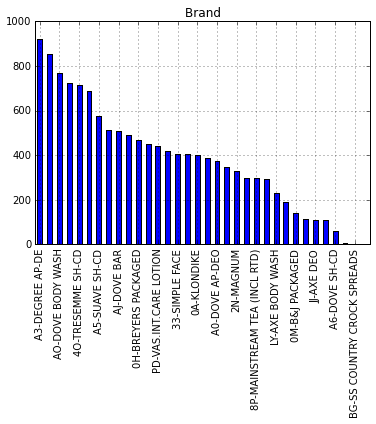

Product 


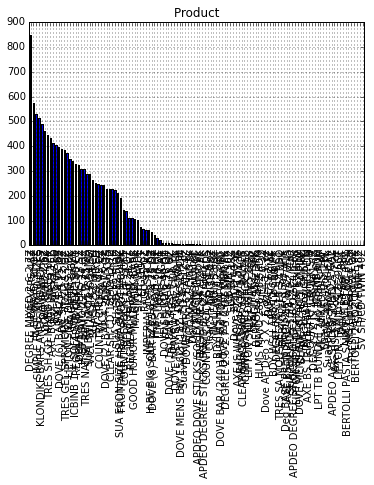

Event Start Date


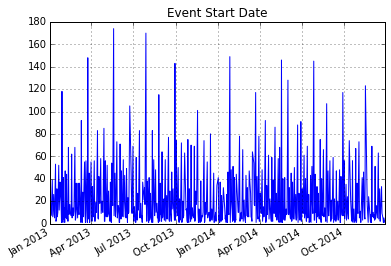

Event Weeks
mean =  1.73120987005 median =  1.0 min =  1.0 max =  18.0



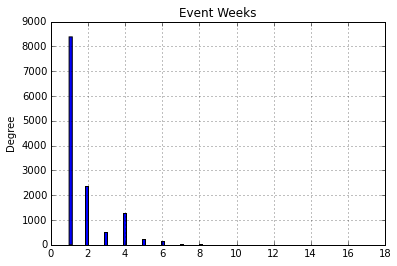

Event Code


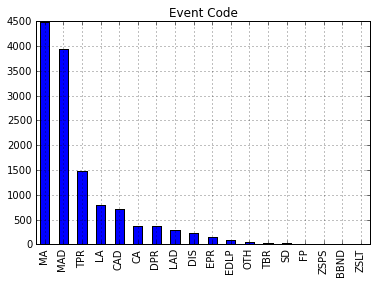

Feature Price
mean =  3.12053612517 median =  3.0 min =  0.0 max =  150.0



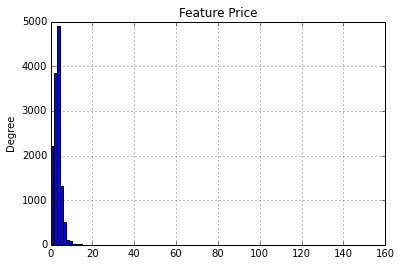

Deal Structure


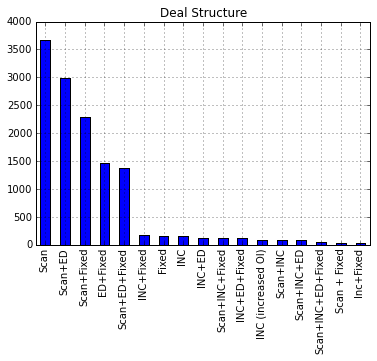

List Price per Unit
mean =  3.72634683234 median =  3.41 min =  0.76 max =  17.17



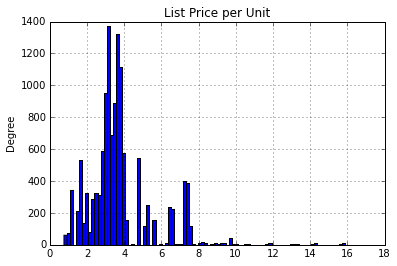

NSV per unit
mean =  3.65304494554 median =  3.34 min =  0.74 max =  16.83



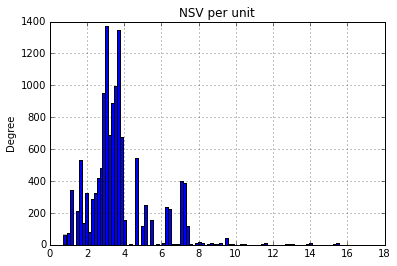

COGS per Unit
mean =  1.18261543181 median =  1.1 min =  0.0 max =  10.48



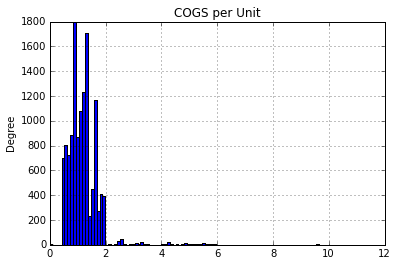

COGS Rate %
mean =  0.343367080841 median =  0.32 min =  0.0 max =  1.33



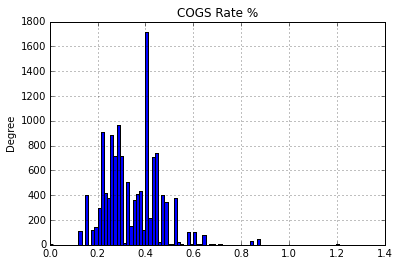

Nielsen Feature Price
mean =  3.66149852602 median =  3.34 min =  0.0 max =  19.98



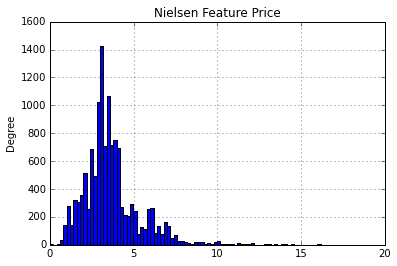

Nielsen Non Promoted Unit Price
mean =  4.32824211671 median =  4.18 min =  0.0 max =  13.41



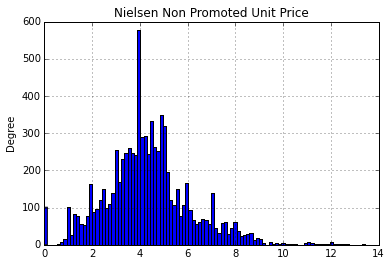

Nielsen AVG Price
mean =  3.59922517121 median =  3.48 min =  0.0 max =  13.99



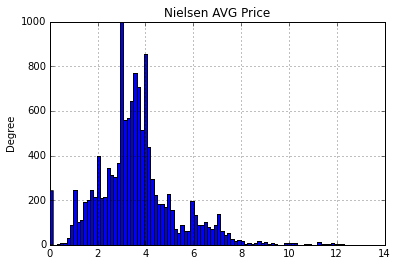

Price Bands


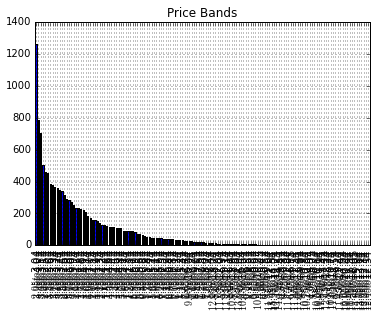

Base Unit   Volume 
mean =  26689.9565117 median =  6875.0 min =  0.0 max =  7605000.0



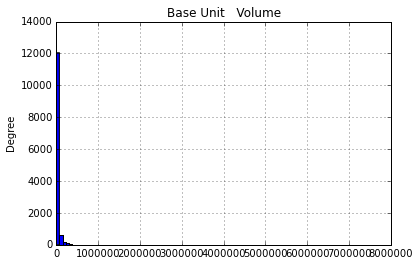

Incr. Unit Volume
mean =  32874.3159227 median =  7013.5 min =  -35905.0 max =  2450028.0



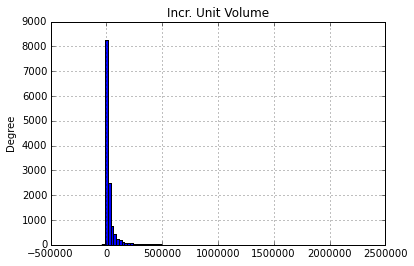

Event Unit Volume
mean =  59564.2722043 median =  16433.5 min =  -1.0 max =  8571472.0



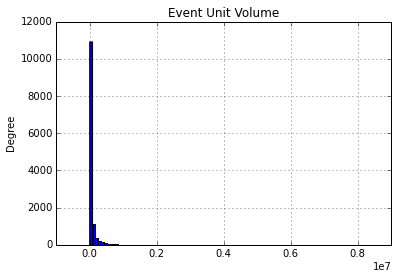

Promoted Units
mean =  55130.1228716 median =  14350.5 min =  0.0 max =  8571472.0



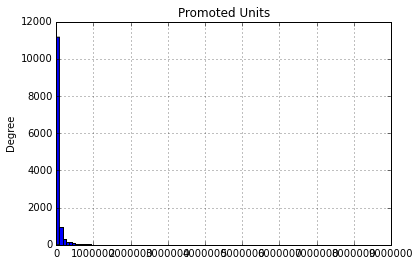

Incr. Non Promo U Vol
mean =  119.725418009 median =  0.0 min =  -48654.0 max =  91947.0



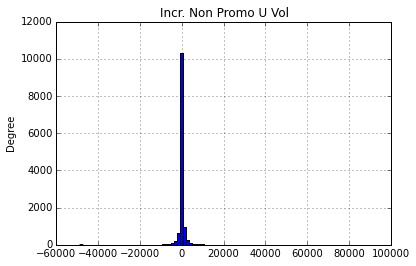

Incr. Any Promo U Vol
mean =  32754.5477834 median =  6983.0 min =  -35904.0 max =  2454787.0



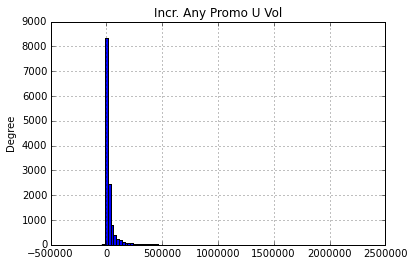

Incr NIP $
mean =  52428.5447921 median =  9427.5 min =  -561118.0 max =  5602147.0



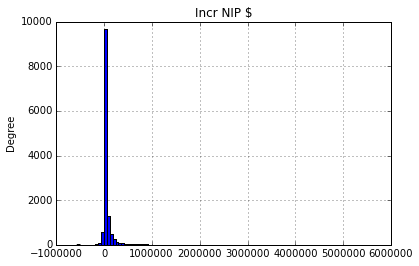

Incr Event % ROI
mean =  0.882674489952 median =  0.415 min =  -49.588 max =  47.287



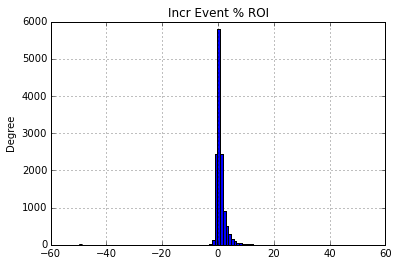

Base COGS
mean =  31728.4486884 median =  7394.0 min =  0.0 max =  10696530.0



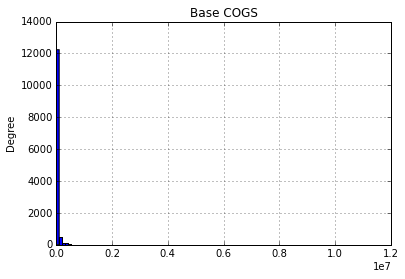

Total Event COGS
mean =  72496.7850897 median =  17624.5 min =  -1.0 max =  12055885.0



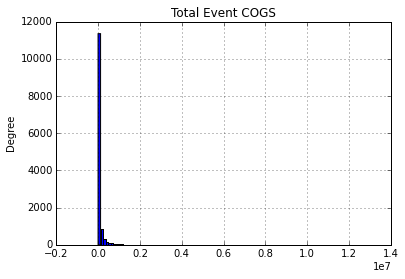

In [39]:
import matplotlib.pyplot as plt
import time


fig = plt.figure()
for key in sub_col[1:]:
    
    
    ax = fig.add_subplot(1,1,1)
    
    try:
        subset[key].replace(regex=True, to_replace=r',', value=r'', inplace=True)
        temp = subset[key].astype(float)
        temp.plot(kind='hist', bins=100, title=key)
        
        print key
        print 'mean = ', temp.mean(), 'median = ', temp.median(), \
        'min = ', temp.min(), 'max = ', temp.max()
        print
    
    except:
        print key
        if key == 'Event Start Date':
            subset[key] = pd.to_datetime(subset[key])
            subset[key].value_counts().plot(title=key)
        else:
            subset[key].value_counts().plot(kind='bar', title=key)
        
        yloc = plt.MaxNLocator(20)
        ax.xaxis.set_major_locator(yloc)
    pass
    
    plt.show()
    #time.sleep(2)

Incr Event % ROI
mean =  0.882674489952 median =  0.415 min =  -49.588 max =  47.287



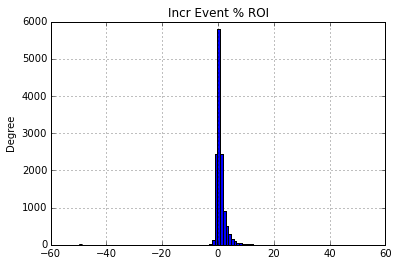

In [40]:
key = 'Incr Event % ROI'

subset[key].replace(regex=True, to_replace=r',', value=r'', inplace=True)
temp = subset[key].astype(float)
temp.plot(kind='hist', bins=100, title=key)

print key
print 'mean = ', temp.mean(), 'median = ', temp.median(), \
'min = ', temp.min(), 'max = ', temp.max()
print

In [41]:
print data[data['Total Event COGS'].replace(regex=True, to_replace=r',', value=r'').astype(float) <= 0].shape
print data[data['Total Sales Contribution'].replace(regex=True, to_replace=r',', value=r'').astype(float) <= 0].shape
print data[data['Event Unit Volume'].replace(regex=True, to_replace=r',', value=r'').astype(float) <= 0].shape
print data[data['Feature Price'].replace(regex=True, to_replace=r',', value=r'').astype(float) == 0].shape

(2, 93)
(590, 93)
(1, 93)
(1574, 93)


### step3: engineering

#### A. ratio features

In [42]:
import numpy as np

def ratio(data, attr1, attr2, bins=100, lower=None, upper=None):

    newAttr = data[[attr1, attr2]]
    newAttr.replace(regex=True, to_replace=r',', value=r'', inplace=True)
    newAttr = newAttr[attr1].astype(float).div(newAttr[attr2].astype(float))
    
    # remove Inf
    temp = newAttr.replace([np.inf, -np.inf], np.nan).dropna()
    
    fig = plt.figure()
    var = 'ratio_' + attr1 + '_' + attr2
    ax = temp.plot(kind='hist', title=var, bins=bins)
    
    if lower and upper:
        ax.set_xlim((lower, upper))
    fig.show()
    
    print var
    print 'mean = ', temp.mean(), 'median = ', temp.median(), \
    'min = ', temp.min(), 'max = ', temp.max(), \
    'inf ratio = ', 1.0 - float( temp.shape[0]) / float(newAttr.shape[0])
    print
    
    return var, newAttr

/home/simengy/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/simengy/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


ratio_Feature Price_Nielsen Feature Price
mean =  0.893042735779 median =  0.992063492063 min =  0.0 max =  101.351351351 inf ratio =  0.000153397760393

ratio_Feature Price_Everyday Price
mean =  0.814335250815 median =  0.906818181818 min =  0.0 max =  92.0245398773 inf ratio =  0.00391164289001

ratio_Event Unit Volume_Eq Volume
mean =  7.52815639073 median =  2.19176433763 min =  -0.0909090909091 max =  73.5 inf ratio =  0.0184844301273

ratio_Event Unit Volume_Promoted Units
mean =  2.08762358483 median =  1.01839315289 min =  -0.25 max =  900.2 inf ratio =  0.000153397760393

ratio_Event Unit Volume_Non-Promoted Units
mean =  729.533075781 median =  6.29579375848 min =  -0.142857142857 max =  308707.0 inf ratio =  0.0924221506366

ratio_% ACV Ftr_% ACV TPR
mean =  0.104302940866 median =  0.0120550527903 min =  0.0 max =  15.3333333333 inf ratio =  0.547783402362

ratio_% ACV Ftr_% ACV  Dsply
mean =  11.2051021891 median =  3.22580645161 min =  0.0 max =  100.0 inf ratio =  0.466

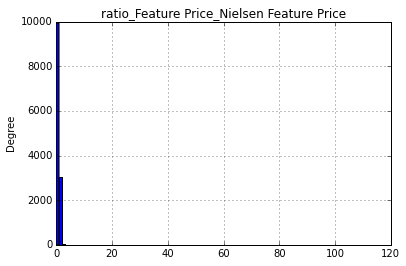

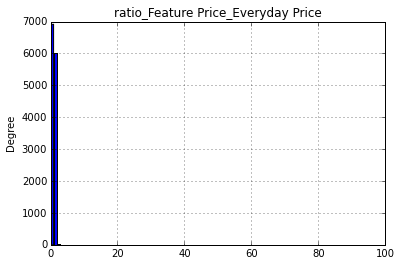

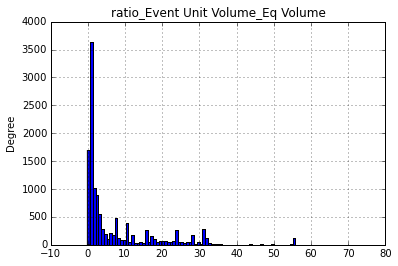

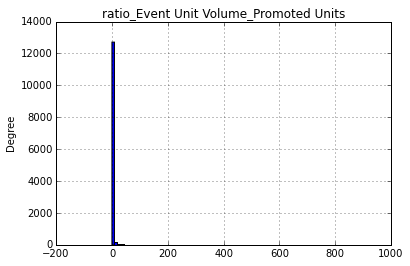

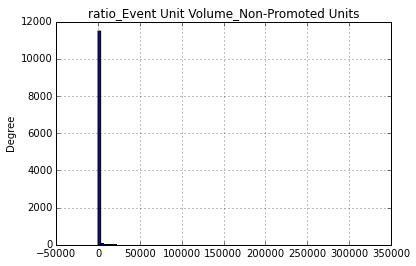

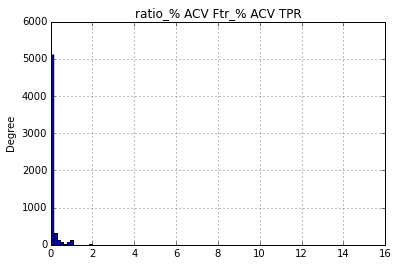

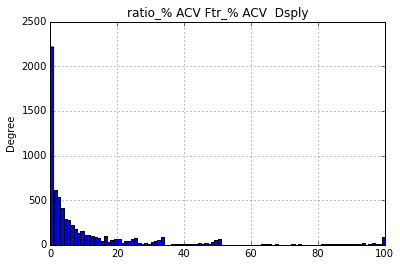

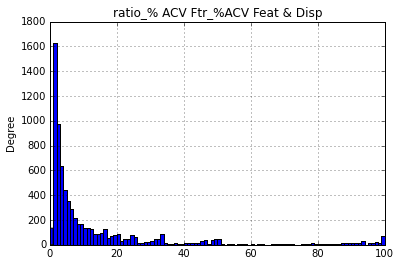

In [43]:
name1 = 'Feature Price'
name2 = 'Nielsen Feature Price'
name, var = ratio(data, name1, name2)
addon = pd.DataFrame(data=var, columns=[name,])


name1 = 'Feature Price'
name2 = 'Everyday Price'
name, var = ratio(data, name1, name2)
addon[name] = var

name1 = 'Event Unit Volume'
name2 = 'Eq Volume'
name, var = ratio(data, name1, name2)
addon[name] = var

name1 = 'Event Unit Volume'
name2 = 'Promoted Units'
name, var = ratio(data, name1, name2)
addon[name] = var

name1 = 'Event Unit Volume'
name2 = 'Non-Promoted Units'
name, var = ratio(data, name1, name2)
addon[name] = var

name1 = '% ACV Ftr'
name2 = '% ACV TPR'
name, var = ratio(data, name1, name2)
addon[name] = var

name1 = '% ACV Ftr'
name2 = '% ACV  Dsply'
name, var = ratio(data, name1, name2)
addon[name] = var

name1 = '% ACV Ftr'
name2 = '%ACV Feat & Disp'
name, var = ratio(data, name1, name2)
addon[name] = var


ratio_Event Unit Volume_Promoted Units
mean =  2.08762358483 median =  1.01839315289 min =  -0.25 max =  900.2 inf ratio =  0.000153397760393



/home/simengy/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


('ratio_Event Unit Volume_Promoted Units', 0         2.403159
 1         1.000000
 2         3.967711
 3         1.000000
 4         2.802027
 5         1.000000
 6         1.000000
 7         1.000000
 8         1.000000
 9        21.560000
 10       20.941980
 11        2.793355
 12        1.007889
 13        1.005676
 14        0.512797
 15        1.002723
 16        1.011794
 17        1.104877
 18        1.009218
 19        0.610773
 20        1.023119
 21        2.915890
 22        1.004658
 23        1.033537
 24        2.446727
 25        1.001782
 26       10.546667
 27        1.096074
 28        1.059733
 29        4.373681
            ...    
 13008     1.564789
 13009     2.024722
 13010     1.448357
 13011     1.187460
 13012     0.974120
 13013     1.013123
 13014     1.162570
 13015     1.872491
 13016     1.164551
 13017     1.089390
 13018     2.595092
 13019     1.338509
 13020     1.418910
 13021     3.131579
 13022     1.680902
 13023     1.518797
 13024     1.20021

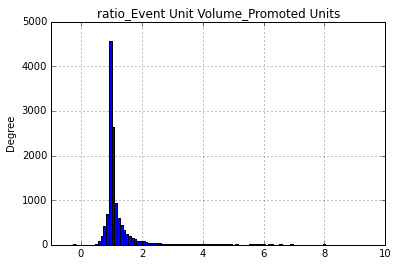

In [44]:
name1 = 'Event Unit Volume'
name2 = 'Promoted Units'
ratio(data, name1, name2, bins=10000, lower=-1, upper=10)

In [45]:
'''
 u'Base Unit   Volume ', u'Incr. Unit Volume',
       u'Event Unit Volume', u'Promoted Units', u'$ Volume', u'Eq Volume',
       u'Non-Promoted Units', u'Baseline Any Promo U Vol',
       u'Incr. Any Promo U Vol', u'Baseline Non Promo U Vol',
       u'Incr. Non Promo U Vol', u'% ACV TPR', u'% ACV Ftr', u'% ACV  Dsply',
       u'%ACV Feat & Disp', u'%ACV Any Promo'
'''

'''
 u'Base COGS', u'Incremental COGS',
       u'Total Event COGS', u'Base $ NSV', u'Incremental $ NSV',
       u'Event $ NSV', u'Base Sales Contribution',
       u'Incremental Sales Contribution', u'Total Sales Contribution'
'''

"\n u'Base COGS', u'Incremental COGS',\n       u'Total Event COGS', u'Base $ NSV', u'Incremental $ NSV',\n       u'Event $ NSV', u'Base Sales Contribution',\n       u'Incremental Sales Contribution', u'Total Sales Contribution'\n"

ratio_Base Unit   Volume _Event Unit Volume
mean =  0.498476204769 median =  0.490072889981 min =  -12.0 max =  8.0 inf ratio =  0.0

ratio_Base COGS_Total Event COGS
mean =  0.498507838711 median =  0.490117773353 min =  -12.0 max =  8.44444444444 inf ratio =  7.66988801963e-05

ratio_Base $ NSV_Event $ NSV
mean =  0.497807505454 median =  0.490071550263 min =  -20.5 max =  7.97297297297 inf ratio =  0.0

ratio_Base Sales Contribution_Total Sales Contribution
mean =  0.98196924742 median =  0.71328072912 min =  -970.0 max =  2039.0 inf ratio =  0.0



/home/simengy/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


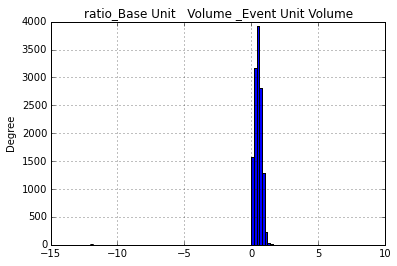

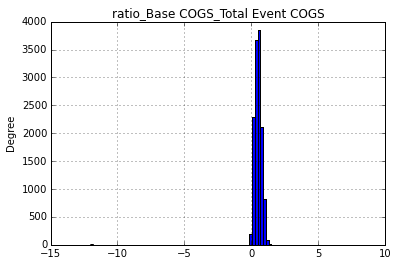

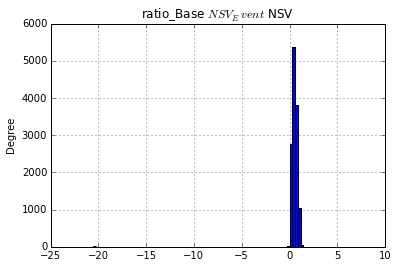

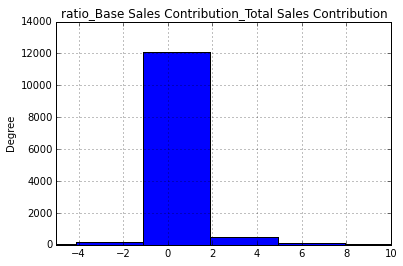

In [46]:
name1 = 'Base Unit   Volume '
name2 = 'Event Unit Volume'
name, var = ratio(data, name1, name2)
addon[name] = var

name1 = 'Base COGS'
name2 = 'Total Event COGS'
name, var = ratio(data, name1, name2)
addon[name] = var

name1 = 'Base $ NSV'
name2 = 'Event $ NSV'
name, var = ratio(data, name1, name2)
addon[name] = var

name1 = 'Base Sales Contribution'
name2 = 'Total Sales Contribution'
name, var = ratio(data, name1, name2, bins=1000, lower=-5, upper=10)
addon[name] = var

ratio_Total Event Cost_Var TS
mean =  1.66191830601 median =  1.0 min =  -732.0 max =  619.75 inf ratio =  0.0118116275502

ratio_Total Event Cost_Tot TS
mean =  1.0 median =  1.0 min =  1.0 max =  1.0 inf ratio =  0.0

ratio_Total Event Cost_Inc TCI
mean =  1.24409545669 median =  1.0 min =  -7.93597951344 max =  46.0 inf ratio =  0.00559901825433

ratio_Total Event Cost_Total TCI
mean =  0.537280887504 median =  0.500784929356 min =  0.428571428571 max =  1.2701754386 inf ratio =  0.00552231937414

ratio_Var TS_Tot TS
mean =  0.850986845989 median =  1.0 min =  -0.00136612021858 max =  1.0 inf ratio =  0.0

ratio_Var TS_Inc TCI
mean =  1.06843044894 median =  1.0 min =  -7.29577464789 max =  46.0 inf ratio =  0.00559901825433

ratio_Var TS_Total TCI
mean =  0.458053813697 median =  0.5 min =  -0.000682593856655 max =  1.26666666667 inf ratio =  0.00552231937414

ratio_Tot TS_Inc TCI
mean =  1.24409545669 median =  1.0 min =  -7.93597951344 max =  46.0 inf ratio =  0.00559901825433

r

/home/simengy/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


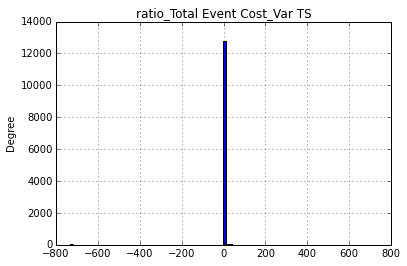

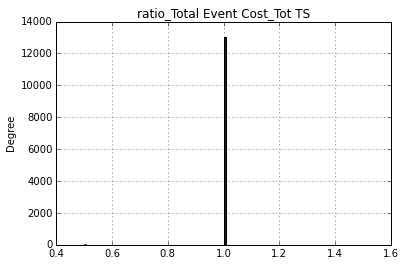

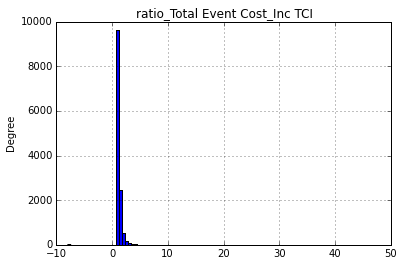

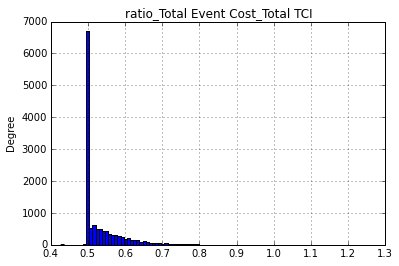

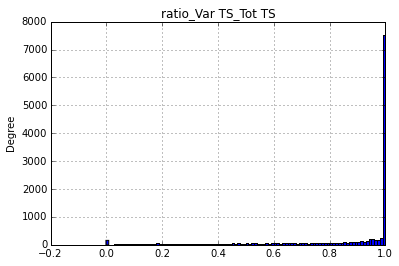

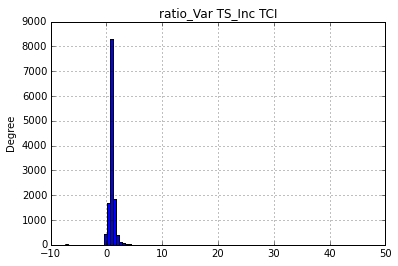

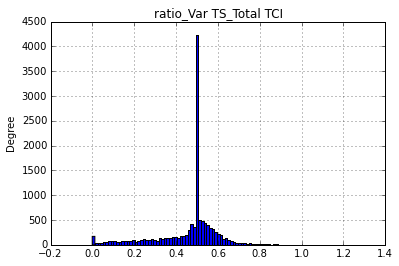

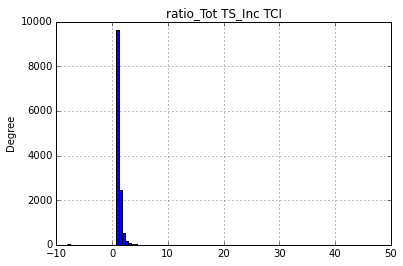

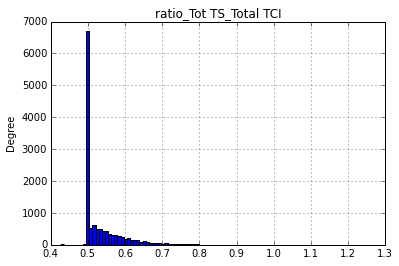

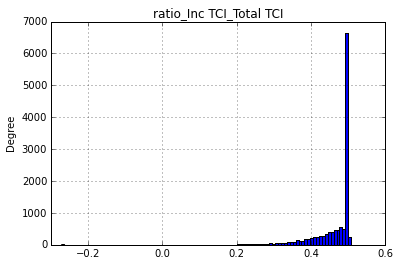

In [47]:
names = [u'Total Event Cost', u'Var TS', u'Tot TS', u'Inc TCI', u'Total TCI']

for i in xrange(len(names)):
    for j in xrange(i+1, len(names)):

        name, var = ratio(data, names[i], names[j])
        addon[name] = var

#### B. sum-up features

In [48]:
import numpy as np

def add(data, attr1, attr2):
    
    newAttr = data[[attr1, attr2]]
    newAttr.replace(regex=True, to_replace=r',', value=r'', inplace=True)
    newAttr = newAttr[attr1].astype(float).add(newAttr[attr2].astype(float))
    
    # remove Inf
    temp = newAttr.replace([np.inf, -np.inf], np.nan).dropna()
    
    fig = plt.figure()
    var = 'sum_' + attr1 + '_' + attr2
    ax = temp.plot(kind='hist', title=var, bins=100)
    #ax.set_xlim((0,10))
    fig.show()
    
    print var
    print temp.mean(), temp.median(), temp.shape, newAttr.shape
    print
    
    return var, newAttr

sum_Var TS_Tot TS
128837.275196 23681.0 (13038,) (13038,)

sum_Promoted Units_Non-Promoted Units
64395.3785857 18450.0 (13038,) (13038,)



/home/simengy/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


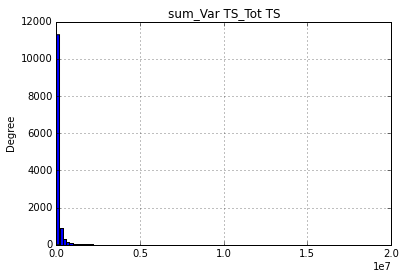

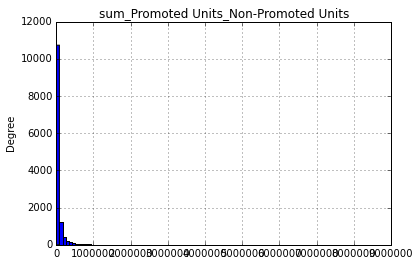

In [49]:
# create add-on dataset and apply the combination of operators
name1 = 'Var TS'
name2 = 'Tot TS'
name, var = add(data, name1, name2)
addon[name] = var


name1 = 'Promoted Units'
name2 = 'Non-Promoted Units'
name, var = add(data, name1, name2)
addon[name] = var

addon['dup_event_unit_volume'] = data['Event Unit Volume']


ratio_sum_Promoted Units_Non-Promoted Units_dup_event_unit_volume
mean =  1.14142594942 median =  1.0 min =  -11.0 max =  8.9 inf ratio =  0.0



/home/simengy/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


('ratio_sum_Promoted Units_Non-Promoted Units_dup_event_unit_volume',
 0        1.000000
 1        1.000000
 2        1.252034
 3        1.000000
 4        1.356884
 5        1.000000
 6        1.000000
 7        1.000000
 8        1.000000
 9        1.000000
 10       1.000000
 11       1.000000
 12       1.000000
 13       1.000000
 14       1.962980
 15       1.000000
 16       1.000000
 17       1.000000
 18       1.000000
 19       2.034967
 20       1.000000
 21       1.250084
 22       1.000000
 23       1.000000
 24       1.000000
 25       1.000000
 26       1.960809
 27       1.000000
 28       1.827111
 29       1.000000
            ...   
 13008    1.000000
 13009    1.166361
 13010    0.998379
 13011    1.000000
 13012    1.190755
 13013    1.000000
 13014    1.080036
 13015    1.220681
 13016    1.000000
 13017    1.000000
 13018    0.998818
 13019    1.426914
 13020    1.153210
 13021    1.372549
 13022    1.000000
 13023    1.000000
 13024    1.295775
 13025    1.206776

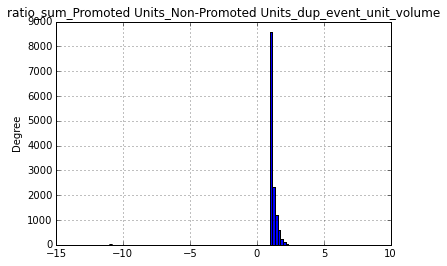

In [50]:
ratio(addon, 'sum_Promoted Units_Non-Promoted Units', 'dup_event_unit_volume')

In [51]:
print addon.shape
print addon[addon['ratio_Feature Price_Everyday Price']>1].shape

print float(2202.0/13038.)

(13038, 25)
(2202, 25)
0.168890934192


#### C. time series

In [52]:
import matplotlib.pyplot as plt

#pd.Categorical(data[['Event Start Date','Product ', 'Feature Price']]).unique()

print pd.Categorical(data['Product ']).unique()

def ts_plot(product, winSize=4):
    
    ts = data[data['Product '].str.contains("(?i)" + product)][['Event Start Date', 'Feature Price']]
    #print ts
    plt.figure()
    ts.index = pd.to_datetime(ts['Event Start Date'])
    ts = pd.rolling_mean(arg = ts['Feature Price'], window = winSize)
    ts.plot(title = product + ' Feature Price')
    plt.xticks(rotation=45)
    plt.show()


['APDEO AXE STICKS/SOLID 2.7 OZ' 'APDEO DEGREE STICKS/SOLID 2.6 OZ Club Pk'
 'APDEO DEGREE STICKS/SOLID 2.7 OZ Club PK'
 'APDEO DOVE STICKS/SOLID 2.6 OZ Club Pk' 'AXE 4.0 OZ BS'
 'AXE BODY WASH 16Z' 'Axe BS 3 X 4 oz + 2.7 oz'
 'AXE BS TRIPLE 144P WHC PDM' 'AXE BS TRPL 12P 4Z W/2.7Z IS'
 'AXE IS WHC 2.7Z W/1.7Z IS' 'AXE SG PDMX' 'B&J PACKAGED'
 'BDY WSH AXE 12 3PK' 'BDY WSH AXE 12 Club Pk' 'BERTOLLI 15oz 4PK'
 'BERTOLLI 24 OZ TRIPLE PK' 'BERTOLLI 24oz 3PK'
 'BERTOLLI PASTA SAUCE 4-15 OZ 3 PK' 'BERTOLLI-5B 24 OZ' 'BREYERS 48Z'
 'Clear SH CD 33.8 oz' 'CLEAR SH/CD 180P 33Z PALLET'
 'CLEAR SH-CD 12.9Z/12.7Z' 'COUNTRY CROCK 1 # SOFT' 'COUNTRY CROCK 45 OZ'
 'COUNTRY CROCK 5 #' 'COUNTRY CROCK SPREADS' 'DECAF TB CUP 144 CT'
 'DEG 2.7Z IS 4PK W/1.7Z' 'Deg BASE PREM SNGL 2 6 & 2 7 A15'
 'DEGREE 2.6-2.7-3.0 OZ TWN PK' 'DEGREE MIXED 2.6-2.7Z'
 'DOVE (14) BAR 4.25-4.75 OZ' 'DOVE (2) BAR 4.25-4.75 OZ'
 'DOVE (6) BAR 4.25-4.75 OZ' 'DOVE (8) BAR  4.25-4.5-4.75 OZ'
 'Dove 14 Bar 3PK' 'Dove 14 Bar Club P

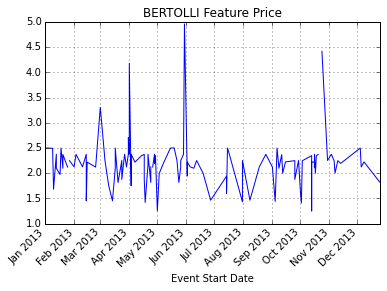

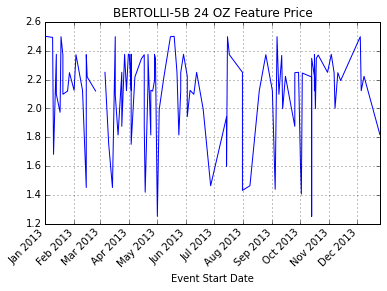

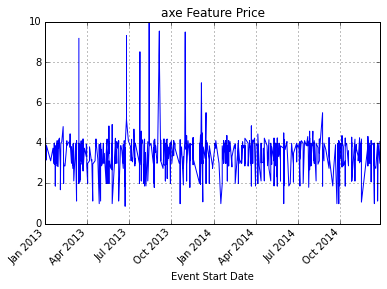

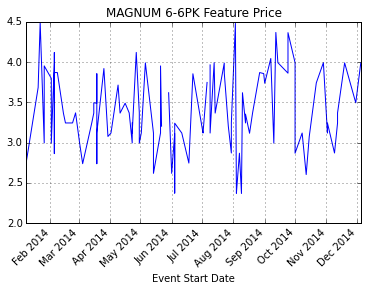

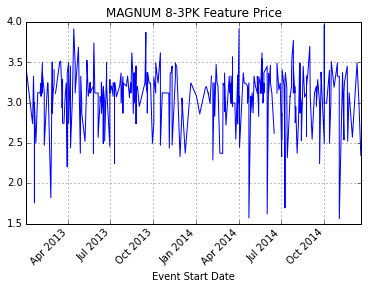

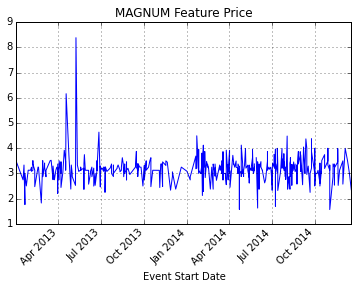

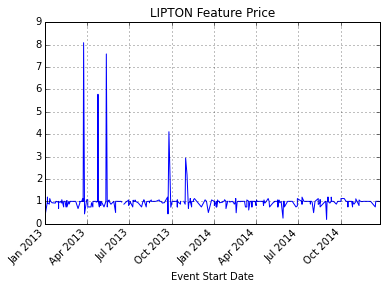

In [53]:
productName = 'BERTOLLI'
ts_plot(productName)

productName = 'BERTOLLI-5B 24 OZ'
ts_plot(productName)

productName = 'axe'
ts_plot(productName)

productName = 'MAGNUM 6-6PK'
ts_plot(productName)

productName = 'MAGNUM 8-3PK'
ts_plot(productName)

productName = 'MAGNUM'
ts_plot(productName)

productName = 'LIPTON'
ts_plot(productName)

/home/simengy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=734942.0, right=734942.0
  'left=%s, right=%s') % (left, right))


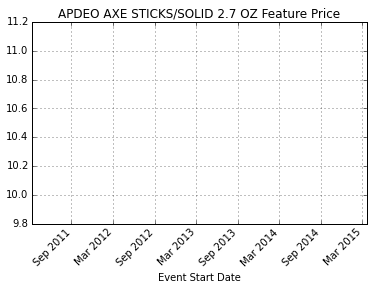

/home/simengy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735046.0, right=735046.0
  'left=%s, right=%s') % (left, right))


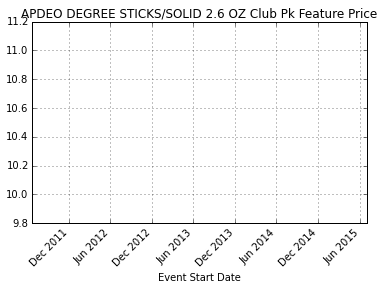

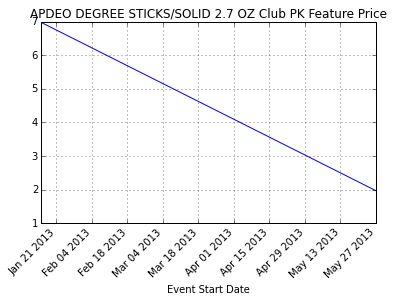

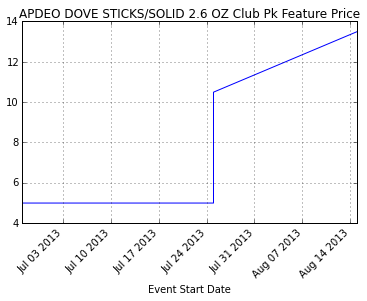

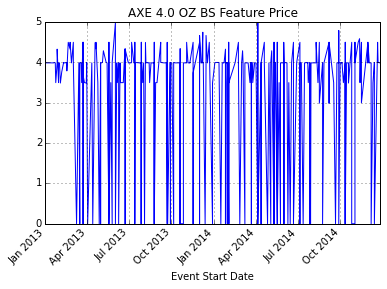

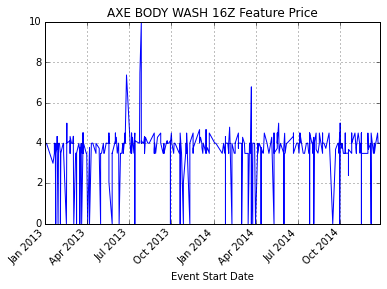

('Warning:\n', 'Axe BS 3 X 4 oz + 2.7 oz', 'does not exist!')


/home/simengy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735207.0, right=735207.0
  'left=%s, right=%s') % (left, right))


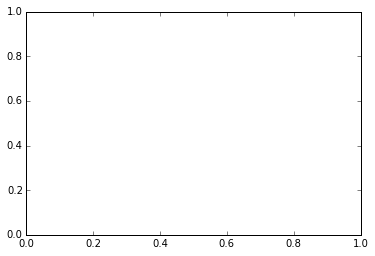

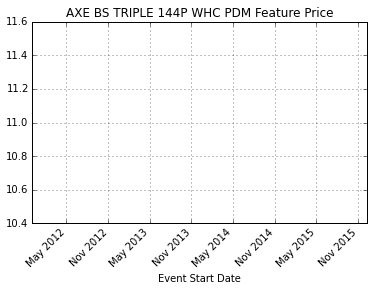

/home/simengy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735116.0, right=735116.0
  'left=%s, right=%s') % (left, right))


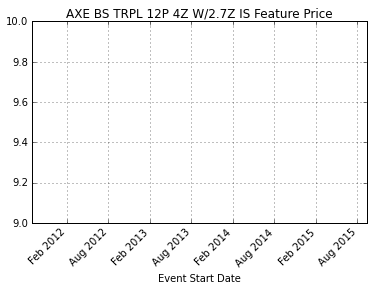

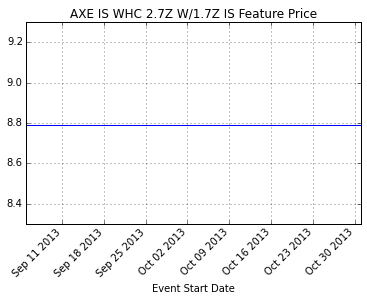

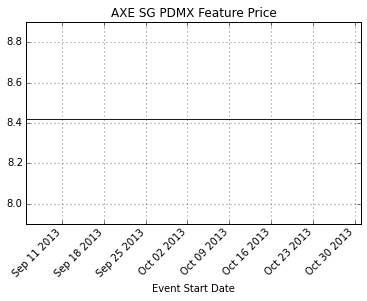

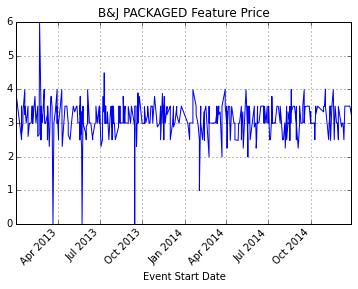

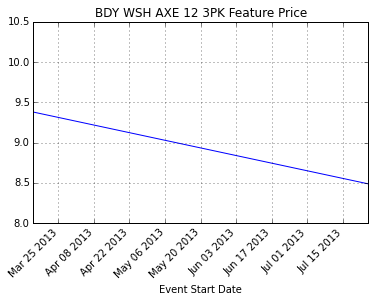

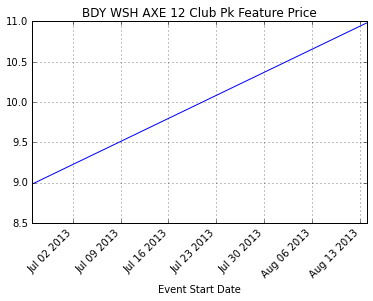

/home/simengy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=734983.0, right=734983.0
  'left=%s, right=%s') % (left, right))


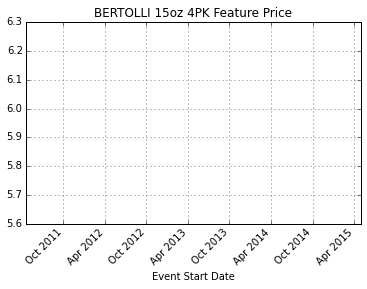

/home/simengy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735165.0, right=735165.0
  'left=%s, right=%s') % (left, right))


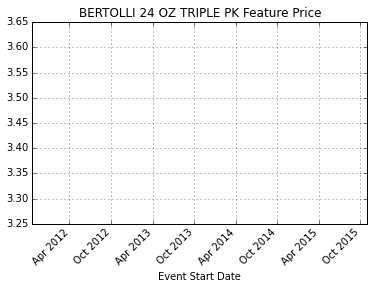

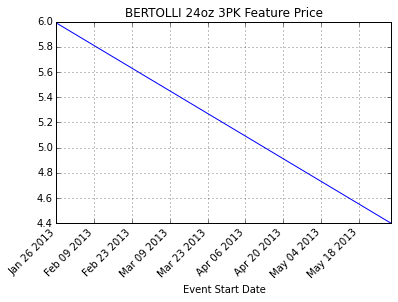

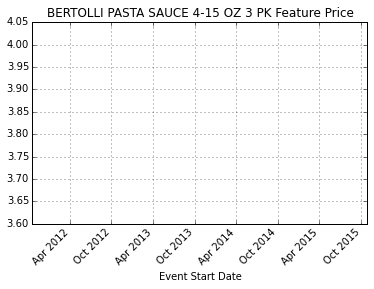

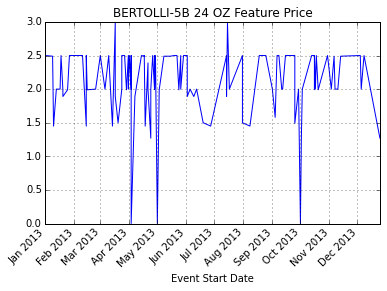

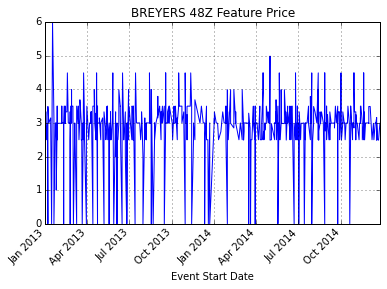

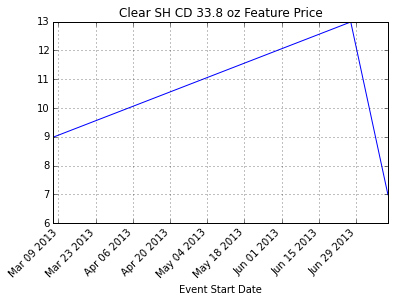

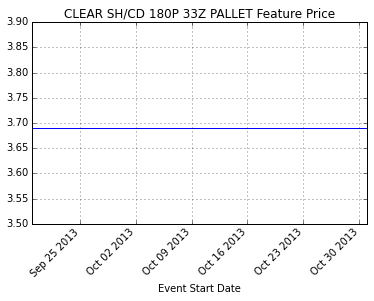

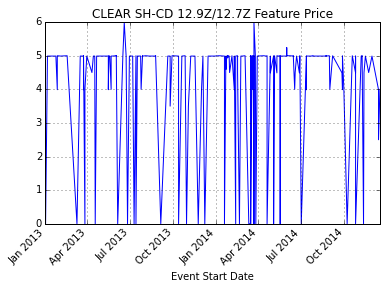

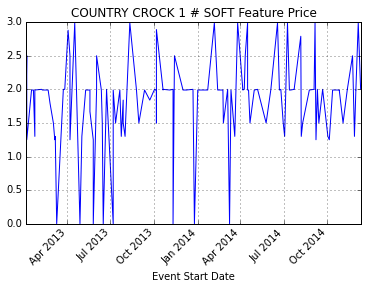

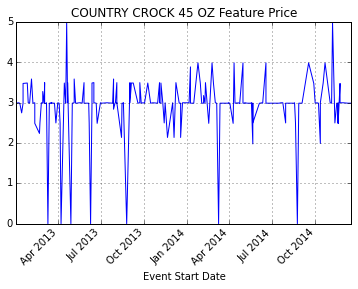

/home/simengy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735171.0, right=735171.0
  'left=%s, right=%s') % (left, right))


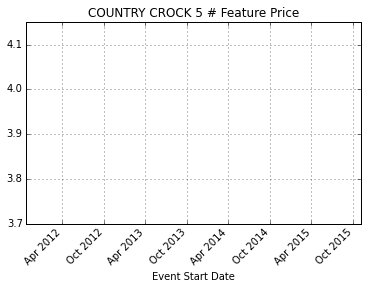

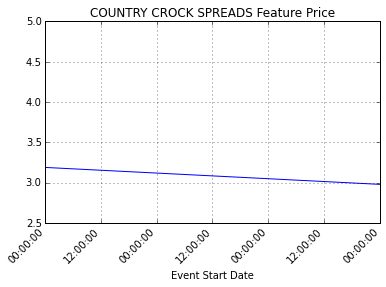

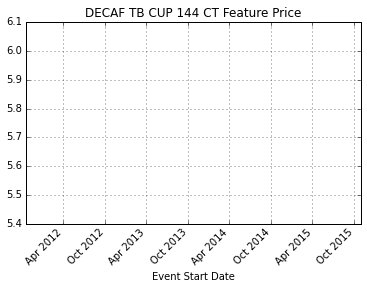

/home/simengy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735114.0, right=735114.0
  'left=%s, right=%s') % (left, right))


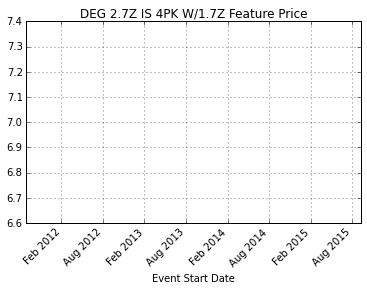

/home/simengy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735016.0, right=735016.0
  'left=%s, right=%s') % (left, right))


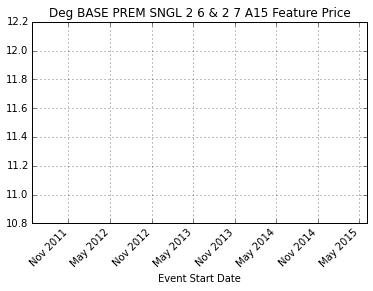

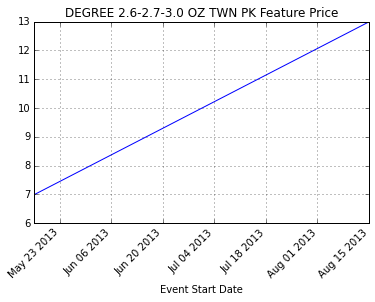

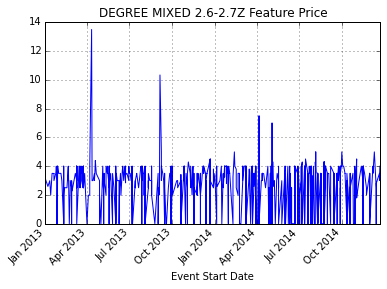

('Warning:\n', 'DOVE (14) BAR 4.25-4.75 OZ', 'does not exist!')
('Warning:\n', 'DOVE (2) BAR 4.25-4.75 OZ', 'does not exist!')
('Warning:\n', 'DOVE (6) BAR 4.25-4.75 OZ', 'does not exist!')
('Warning:\n', 'DOVE (8) BAR  4.25-4.5-4.75 OZ', 'does not exist!')

/home/simengy/.virtualenvs/socialCircle/lib/python2.7/site-packages/pandas/core/strings.py:184: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  " groups, use str.extract.", UserWarning)
/home/simengy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735108.0, right=735108.0
  'left=%s, right=%s') % (left, right))


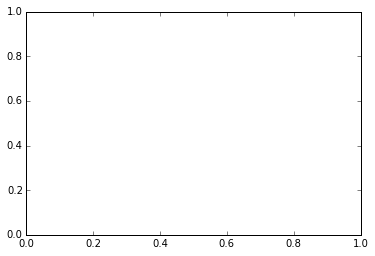

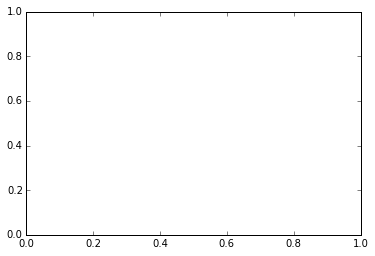

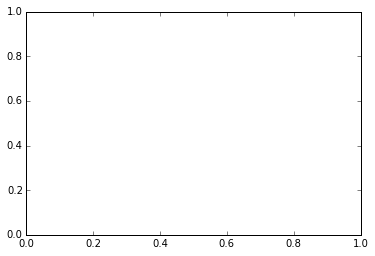

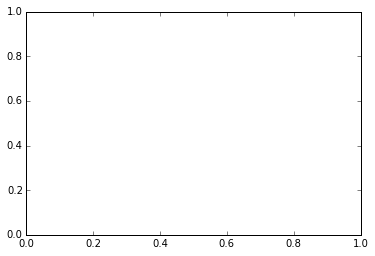

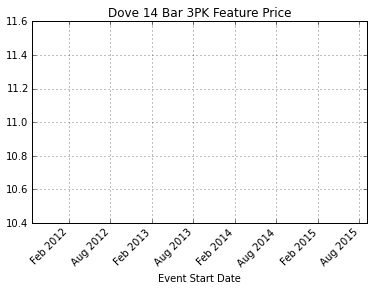

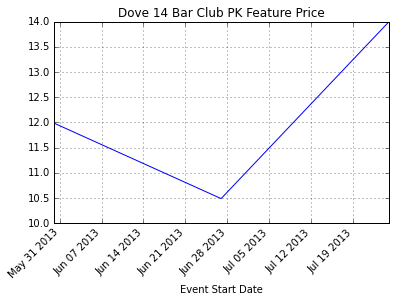

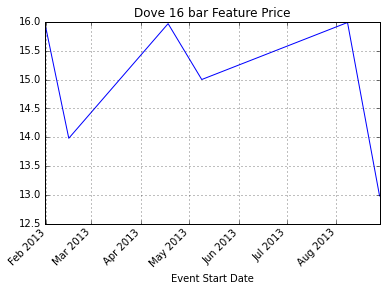

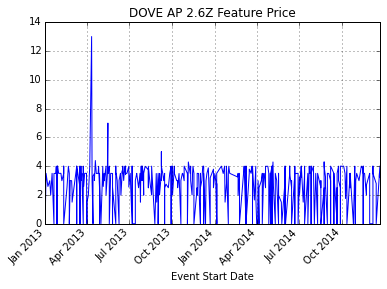

('Warning:\n', 'Dove AP Deo 3 X 2.6 oz + 1.6 oz', 'does not exist!')
('Warning:\n', 'DOVE BAR (240)14 59.5Z PDM W/SKIRT', 'does not exist!')


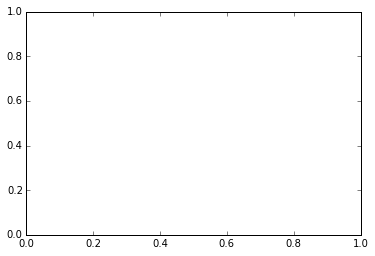

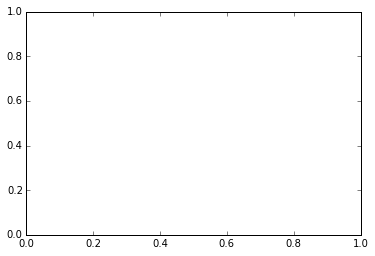

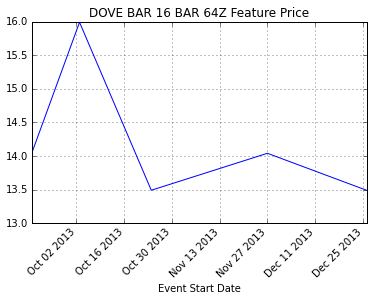

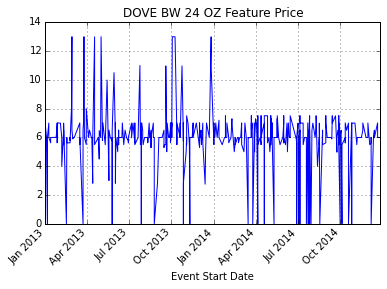

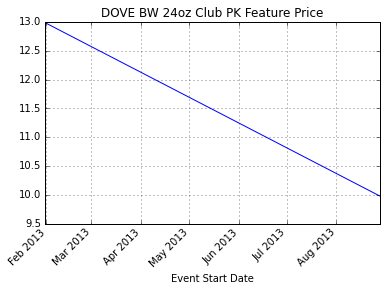

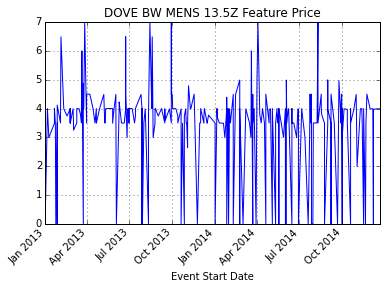

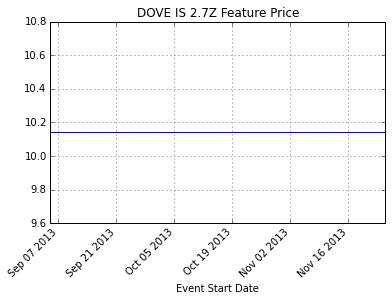

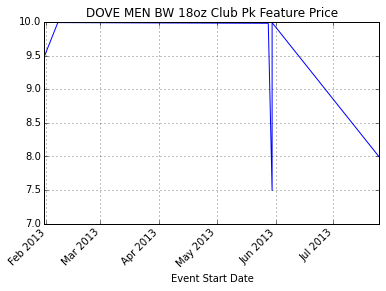

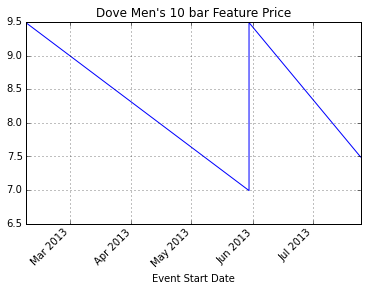

('Warning:\n', 'DOVE MENS BW 156(3) 18Z + 13.5Z PDM', 'does not exist!')
('Warning:\n', 'DOVE MENS BW 18Z+13.5Z PDM', 'does not exist!')


/home/simengy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735074.0, right=735074.0
  'left=%s, right=%s') % (left, right))


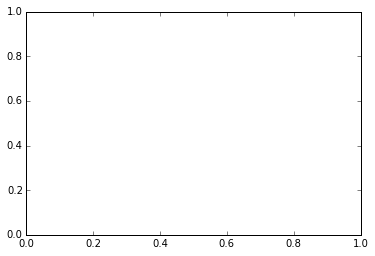

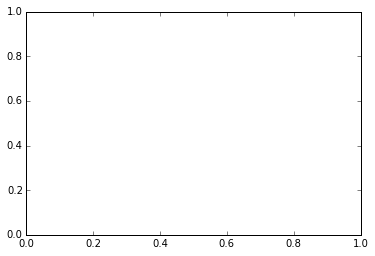

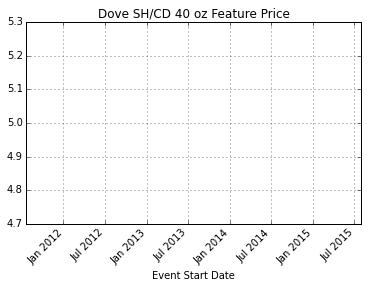

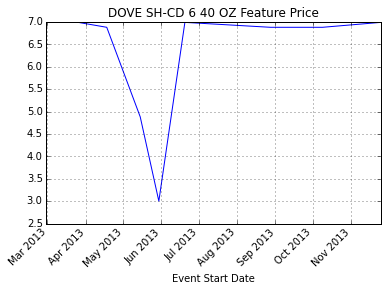

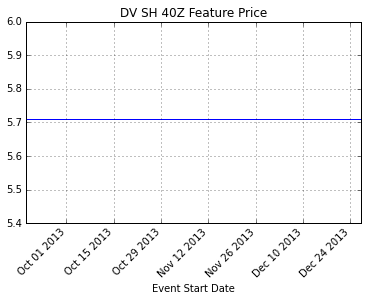

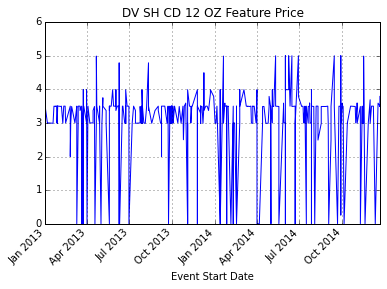

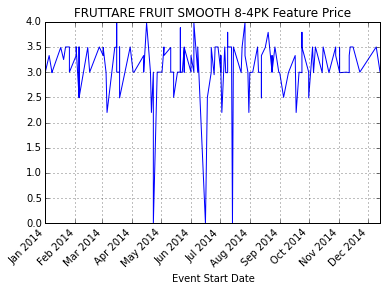

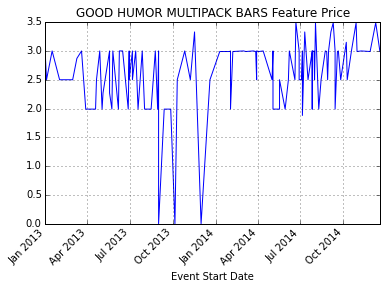

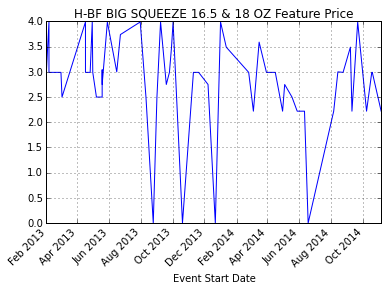

/home/simengy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735190.0, right=735190.0
  'left=%s, right=%s') % (left, right))


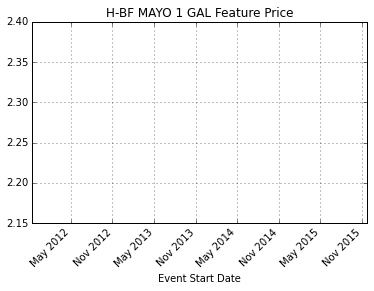

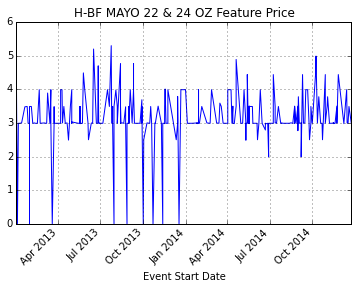

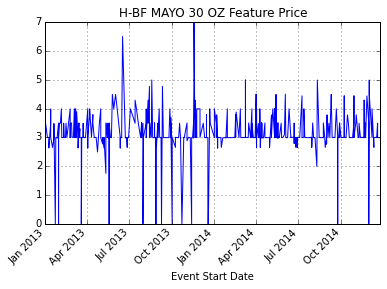

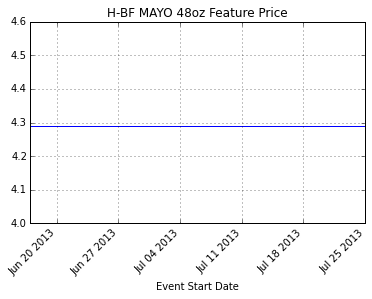

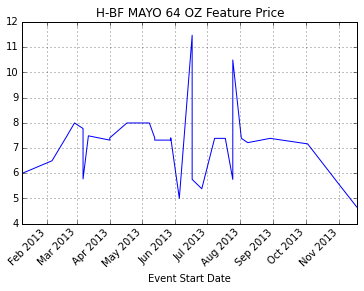

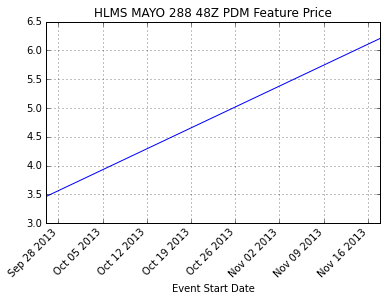

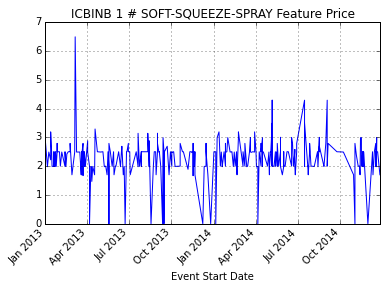

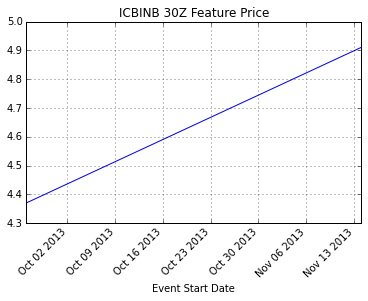

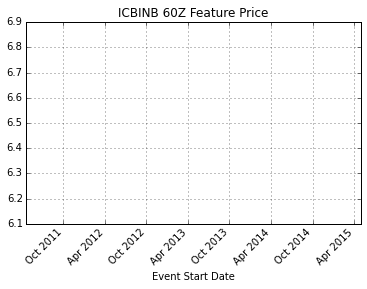

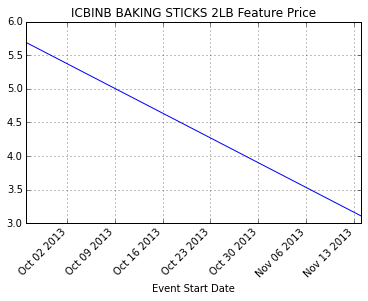

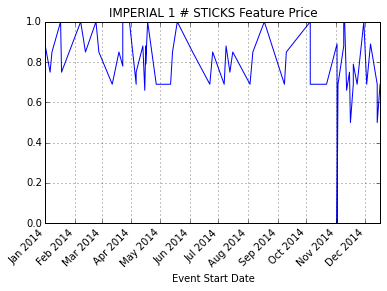

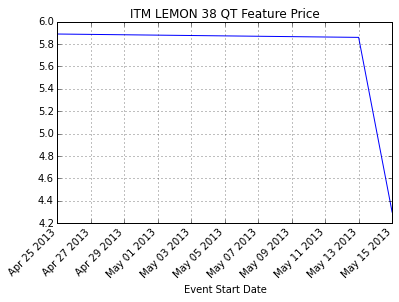

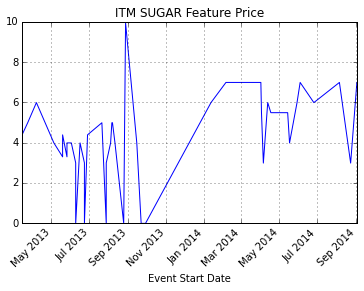

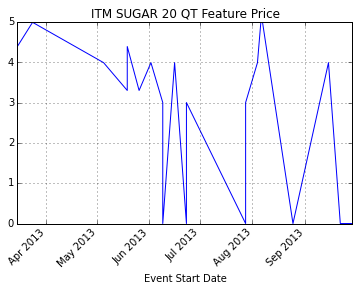

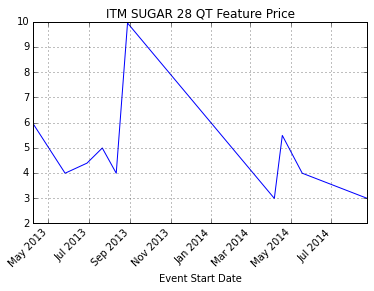

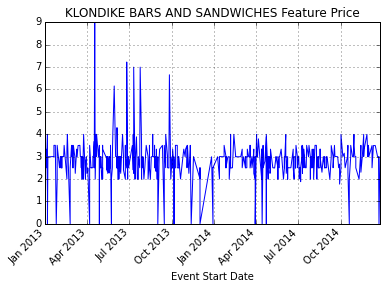

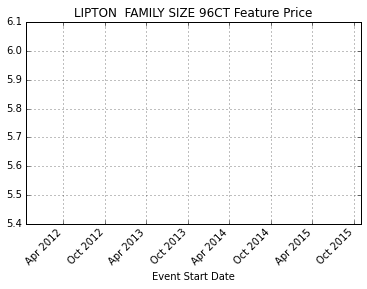

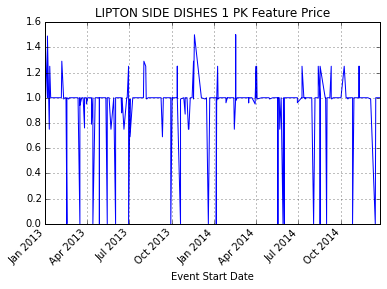

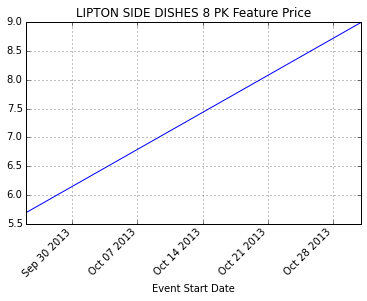

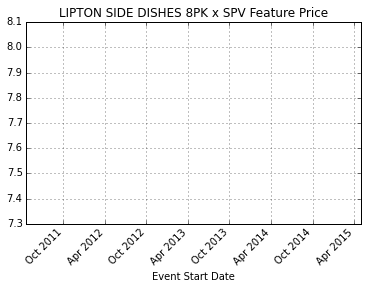

/home/simengy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=734952.0, right=734952.0
  'left=%s, right=%s') % (left, right))


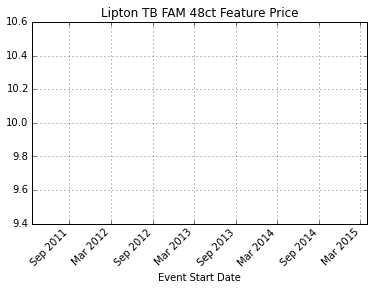

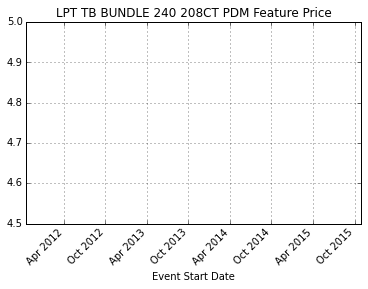

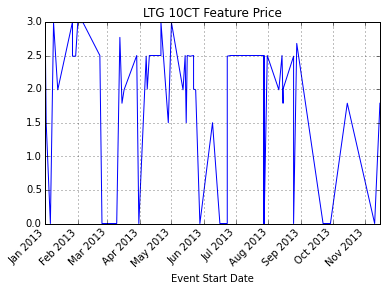

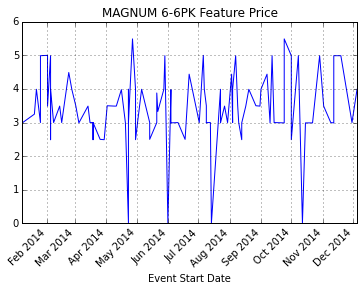

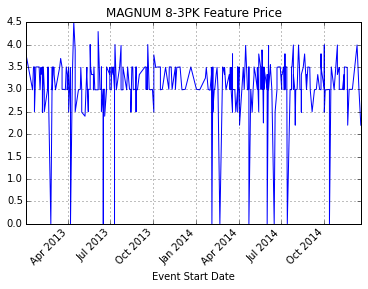

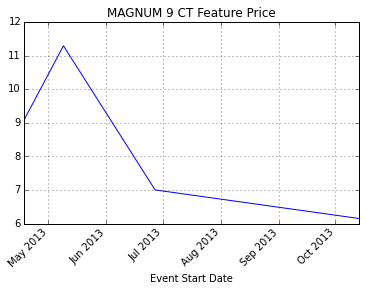

/home/simengy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735001.0, right=735001.0
  'left=%s, right=%s') % (left, right))


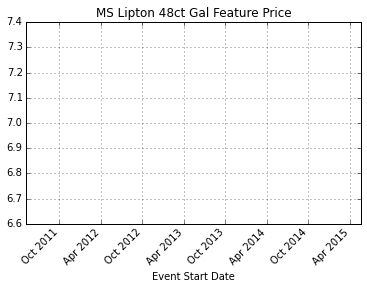

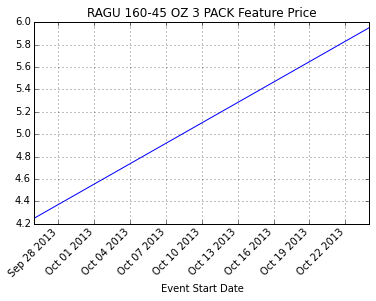

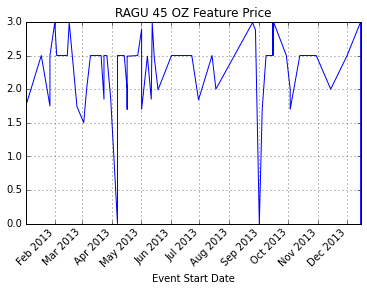

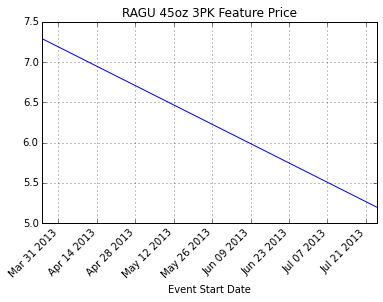

/home/simengy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=734959.0, right=734959.0
  'left=%s, right=%s') % (left, right))


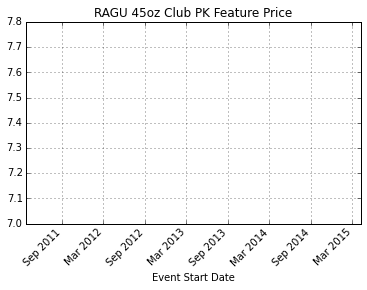

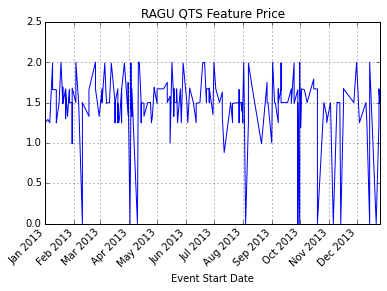

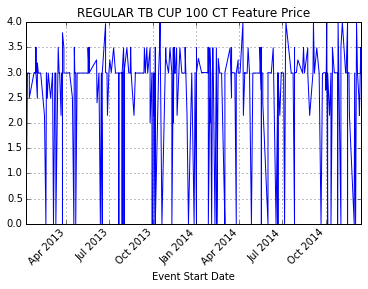

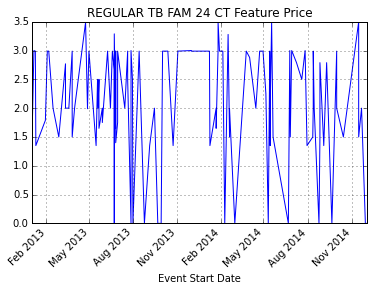

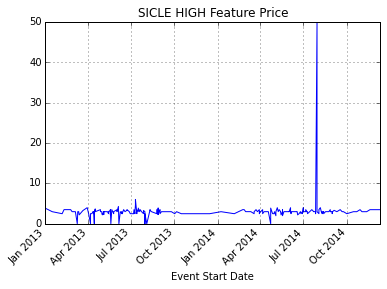

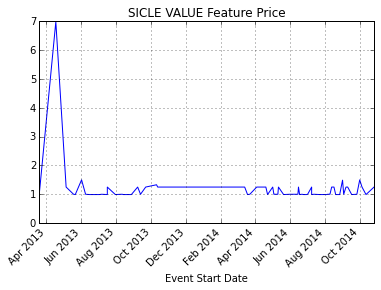

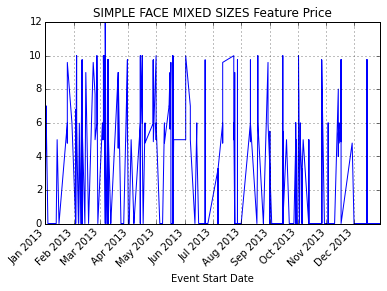

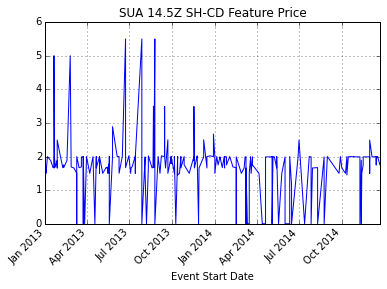

('Warning:\n', 'SUA BW 12 OZ (354ML)', 'does not exist!')


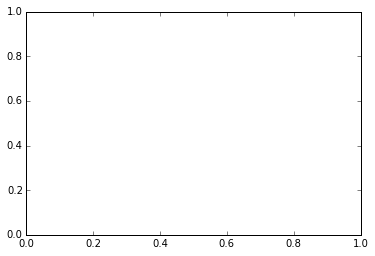

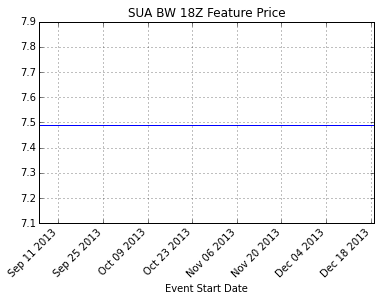

('Warning:\n', 'SUA BW KIDS 10(4) 12Z PDQ', 'does not exist!')


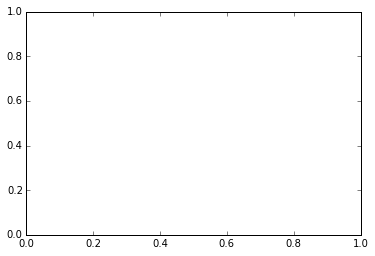

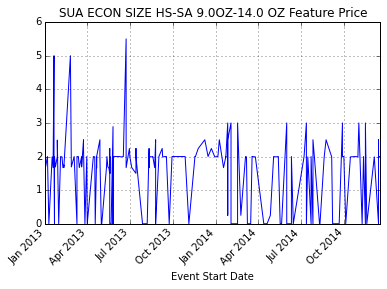

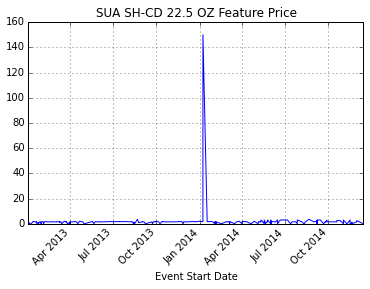

/home/simengy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=734976.0, right=734976.0
  'left=%s, right=%s') % (left, right))


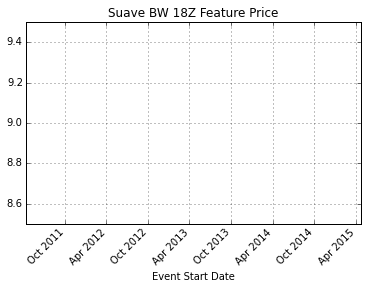

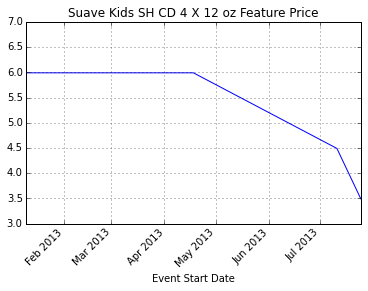

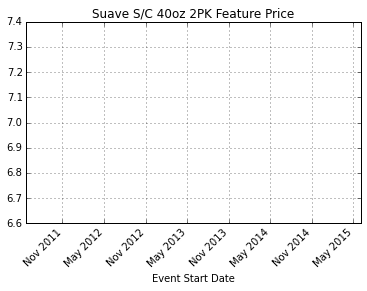

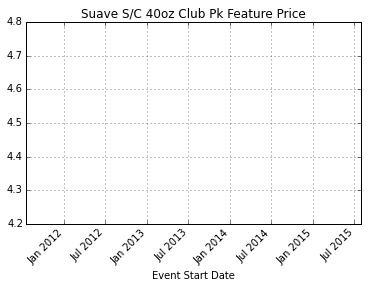

/home/simengy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735173.0, right=735173.0
  'left=%s, right=%s') % (left, right))


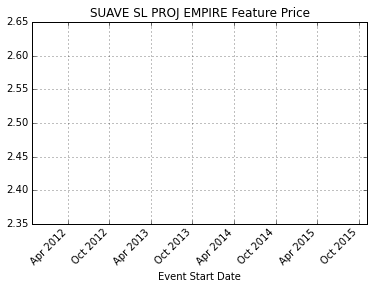

/home/simengy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735221.0, right=735221.0
  'left=%s, right=%s') % (left, right))


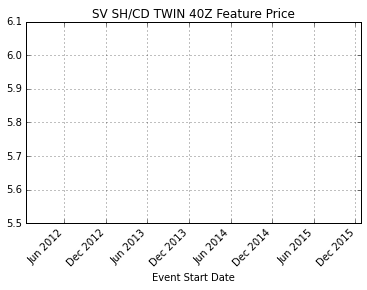

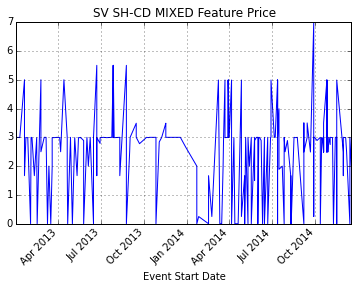

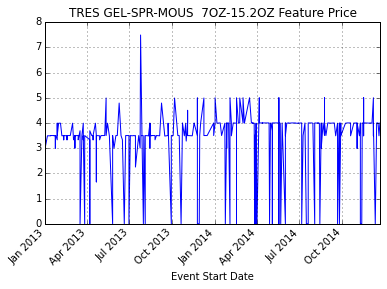

/home/simengy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735193.0, right=735193.0
  'left=%s, right=%s') % (left, right))


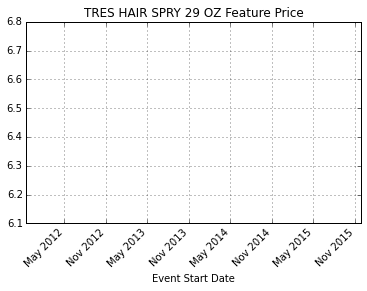

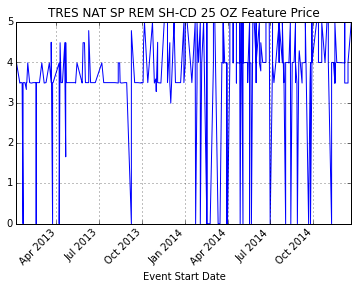

('Warning:\n', 'TRES SA MOUSSE 20(3)10.5Z PDQ', 'does not exist!')


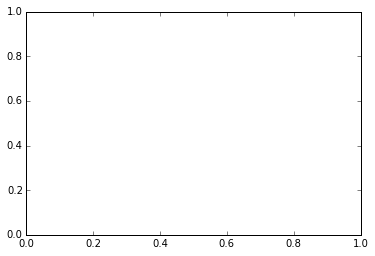

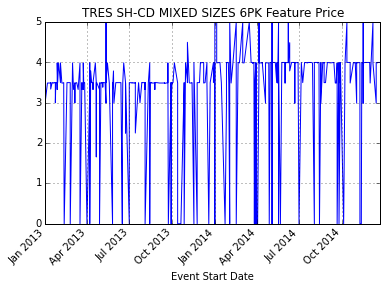

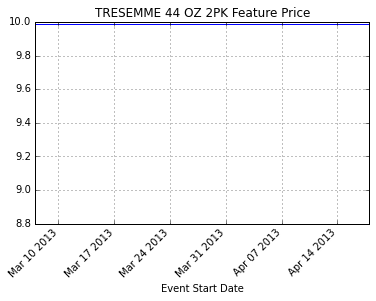

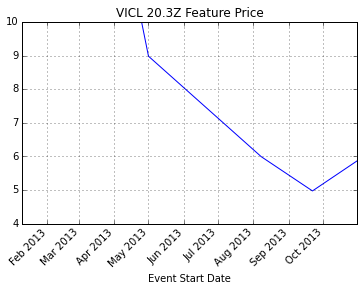

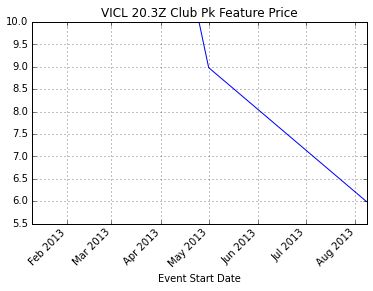

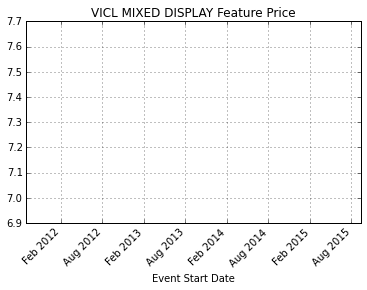

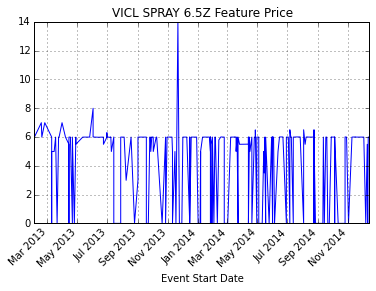

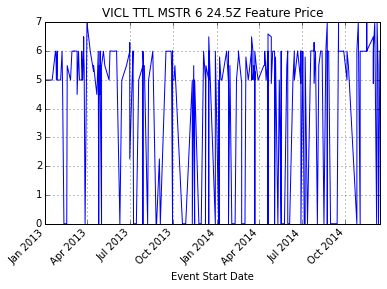

In [54]:
for key in pd.Categorical(data['Product ']).unique():
    try:
        ts_plot(key, winSize=1)
    except:
        print ValueError('Warning:\n', key, 'does not exist!')

### Step4: Model Training

In [55]:
sub_col = ['Brand ', 'Event Start Date', 'Event Weeks', 'Feature Price','Everyday Price', 'EDLP Rate',
       'Deal Structure', 'List Price per Unit', 'NSV per unit', 'COGS per Unit', 'COGS Rate %',
       'Base Unit   Volume ',
       'Event Unit Volume', 'Promoted Units', '$ Volume', 'Eq Volume',
       'Non-Promoted Units', u'Baseline Any Promo U Vol',
       'Baseline Non Promo U Vol',
       '% ACV TPR', '% ACV Ftr', '% ACV  Dsply',
       '%ACV Feat & Disp', 'Total Sales Contribution',
        'Base COGS', 'Total Event COGS']

subset = data.loc[:, sub_col]
target = data.loc[:, ['Incr Event % ROI']]
print subset.shape


(13038, 26)


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split 

from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn import cross_validation

sub_col = [ 'Event Weeks', 'Feature Price','Everyday Price', 'EDLP Rate',
        'List Price per Unit', 'NSV per unit', 'COGS per Unit', 'COGS Rate %',
       'Base Unit   Volume ',
       'Event Unit Volume', 'Promoted Units', '$ Volume', 'Eq Volume',
       'Non-Promoted Units', u'Baseline Any Promo U Vol',
       'Baseline Non Promo U Vol',
       '% ACV TPR', '% ACV Ftr', '% ACV  Dsply',
       '%ACV Feat & Disp', 'Total Sales Contribution',
        'Base COGS', 'Total Event COGS']

for key in sub_col:
    subset[key].replace(regex=True, to_replace=r',', value=r'', inplace=True)
    subset[key] = subset[key].astype(float)
    
subset['Event Start Date'] = pd.to_datetime(subset['Event Start Date'])
subset['weekday'] = subset['Event Start Date'].apply(lambda x:x.weekday())
subset = subset.drop('Event Start Date', axis=1)

vectorizer = DictVectorizer(sparse=False)
train = vectorizer.fit_transform(subset.T.to_dict().values())
feature_name = vectorizer.feature_names_


In [62]:
train = pd.DataFrame(train, columns=feature_name)
train = train.fillna(train.mean())

x_train, x_test, y_train, y_test = train_test_split(train, target.iloc[:,0], test_size=0.3)

rf = RandomForestRegressor(300, max_depth=15, n_jobs=16, verbose=1)
model = rf.fit(x_train, y_train)
pred = model.predict(x_test)

print 'MSE = ', mean_squared_error(y_test, pred)
print 'RMSE = ', np.sqrt(mean_squared_error(y_test, pred))

[Parallel(n_jobs=16)]: Done   1 out of  16 | elapsed:    3.5s remaining:   52.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    4.2s finished


MSE =  2.50227276087
RMSE =  1.58185737691


[Parallel(n_jobs=16)]: Done   1 out of  16 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished


In [59]:
svr = SVR(C=0.0001)

pred = svr.fit(x_train, y_train).predict(x_test)
print 'RMSE = ', np.sqrt(mean_squared_error(y_test, pred))


 RMSE =  2.21406980354


####4.1.2 Variable Importance

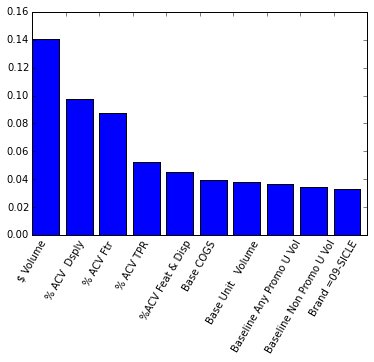

In [64]:
import matplotlib.pyplot as plt

first_n = 10
indices = np.argsort(model.feature_importances_)[::-1]

plt.figure()
plt.bar(range(first_n), model.feature_importances_[indices][:first_n] )
plt.xticks(range(first_n), feature_name[:first_n], rotation=60)

plt.show()

####4.1.3 Date Range

In [63]:
pd.to_datetime(data['Event Start Date']).max(), pd.to_datetime(data['Event Start Date']).min(), 

(Timestamp('2014-12-28 00:00:00'), Timestamp('2013-01-01 00:00:00'))

##TODO LIST :  1. UVG, ROI; 2. ICE Cream; 3. Time series Analysis, correlation;

### Reduced Data Set and retrain the model

In [536]:
reduced = pd.read_excel('./meta_data_for_modeling_0713.xlsx')

In [537]:
print reduced.shape, reduced.columns

numeric_cols = [ u'Roi Id',  u'Year', u'Feature Price',
                  u'NSV per unit',                  u'COGS per Unit',
                  u'Everyday Price',                u'Plan Scan Units',
                  u'Plan Shipped Units',          
                  u'Nielsen Feature Price',            u'Base Unit   Volume',
                  u'$ Volume',                      u'Eq Volume',
                  u'Baseline Any Promo U Vol',       u'Baseline Non Promo U Vol',
                  u'TQMP',               u'Total Event Cost',
                  u'Base Subsidy',              u'Nielsen_price_diff',
                  u'Std_price_diff',               u'Incr Event % ROI',
                  u'Incr. Unit Volume',          u'Incr. Any Promo U Vol',
                  u'Incremental Sales Contribution']

(11343, 41) Index([u'Roi Id', u'Year', u'Sector', u'Division', u'Planned Account Name', u'MLT', u'Category', u'Brand', u'Product', u'Event Start Date', u'Event Weeks', u'Event Code', u'Feature Price', u'Deal Structure', u'NSV per unit', u'COGS per Unit', u'Everyday Price', u'Plan Scan Units', u'Plan Shipped Units', u'Nielsen Customer Name', u'Nielson Product Name', u'Nielsen Category', u'Nielsen Event Week', u'Nielsen Feature Price', u'Price Bands', u'Base Unit   Volume', u'$ Volume', u'Eq Volume', u'Baseline Any Promo U Vol', u'Baseline Non Promo U Vol', u'TQMP', u'Total Event Cost', u'Base Subsidy', u'Event Description', u'Channel', u'Nielsen_price_diff', u'Std_price_diff', u'Incr Event % ROI', u'Incr. Unit Volume', u'Incr. Any Promo U Vol', u'Incremental Sales Contribution'], dtype='object')


In [538]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split 

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction import DictVectorizer
from sklearn import cross_validation

for key in numeric_cols:
    reduced[key].replace(regex=True, to_replace=r',', value=r'', inplace=True)
    reduced[key] = reduced[key].astype(float)
    
target = reduced['Incr Event % ROI']
reduced = reduced.iloc[:,1:37] 
    
reduced['Event Start Date'] = pd.to_datetime(reduced['Event Start Date'])
reduced['weekday'] = reduced['Event Start Date'].apply(lambda x:x.weekday())
reduced['month'] = reduced['Event Start Date'].apply(lambda x:x.month)
icecream['month'] = icecream['month'].astype(str)
icecream['weekday'] = icecream['weekday'].astype(str)
reduced = reduced.drop('Event Start Date', axis=1)
reduced = reduced.drop('Nielsen Event Week', axis=1)
reduced = reduced.drop('Event Description', axis=1)

vectorizer = DictVectorizer(sparse=False)

train = vectorizer.fit_transform(reduced.T.to_dict().values())
feature_name = vectorizer.feature_names_

In [539]:
print target.shape,  reduced.columns

(11343,) Index([u'Year', u'Sector', u'Division', u'Planned Account Name', u'MLT', u'Category', u'Brand', u'Product', u'Event Weeks', u'Event Code', u'Feature Price', u'Deal Structure', u'NSV per unit', u'COGS per Unit', u'Everyday Price', u'Plan Scan Units', u'Plan Shipped Units', u'Nielsen Customer Name', u'Nielson Product Name', u'Nielsen Category', u'Nielsen Feature Price', u'Price Bands', u'Base Unit   Volume', u'$ Volume', u'Eq Volume', u'Baseline Any Promo U Vol', u'Baseline Non Promo U Vol', u'TQMP', u'Total Event Cost', u'Base Subsidy', u'Channel', u'Nielsen_price_diff', u'Std_price_diff', u'weekday', u'month'], dtype='object')


In [540]:
train = pd.DataFrame(train, columns=feature_name)
train = train.fillna(train.mean())

rf = RandomForestRegressor(50, max_depth=12, n_jobs=20, verbose=0)
cv_mse = -cross_validation.cross_val_score(rf, train, target, cv=5, scoring='mean_squared_error')
cv_r2 = cross_validation.cross_val_score(rf, train, target, cv=5, scoring='r2')

In [541]:
print 'MSE = ', np.mean(cv_mse), np.mean(cv_r2)
print 'RMSE = ', np.sqrt(np.mean(cv_mse))
print cv_mse, cv_r2

MSE =  2.30443359457 0.501040609601
RMSE =  1.51803609791
[ 1.88566221  4.04880845  2.15006043  1.60878674  1.82885015] [ 0.46096027  0.46738517  0.54035325  0.48741982  0.54908453]


In [542]:
train = pd.DataFrame(train, columns=feature_name)
train = train.fillna(train.mean())

x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.3)

rf = RandomForestRegressor(500, max_depth=12, n_jobs=20, verbose=0)

model = rf.fit(x_train, y_train)
pred = model.predict(x_test)

print 'MSE = ', mean_squared_error(y_test, pred)
print 'R2 = ', r2_score(y_test, pred) 

MSE =  2.00625557462
R2 =  0.597210425987


### try K-folds

In [521]:
train = pd.DataFrame(train, columns=feature_name)
train = train.fillna(train.mean())

kf_ind = cross_validation.KFold(train.shape[0] ,n_folds=3)

rf = RandomForestRegressor(500, max_depth=12, n_jobs=20, verbose=1)

mse = []
r2 = []

for train_ind, test_ind in kf_ind:

    model = rf.fit(train.iloc[train_ind,], target.iloc[train_ind,])
    pred = model.predict(train.iloc[test_ind,])

    mse.append(mean_squared_error(target.iloc[test_ind,], pred))
    r2.append(r2_score(target.iloc[test_ind,], pred))
    print 'MSE = ', mse
    print 'r2 = ', r2

[Parallel(n_jobs=20)]: Done   1 out of  20 | elapsed:    8.6s remaining:  2.7min
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    8.9s finished
[Parallel(n_jobs=20)]: Done   1 out of  20 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Done   1 out of  20 | elapsed:    8.3s remaining:  2.6min
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    8.7s finished


MSE =  [2.4484342992840702]
r2 =  [0.53378524267763727]
MSE = 

[Parallel(n_jobs=20)]: Done   1 out of  20 | elapsed:    0.0s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Done   1 out of  20 | elapsed:    7.4s remaining:  2.4min
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    8.4s finished


 [2.4484342992840702, 2.9020539536994936]
r2 =  [0.53378524267763727, 0.44461718485850221]
MSE =  [2.4484342992840702, 2.9020539536994936, 1.6429583467327622]
r2 =  [0.53378524267763727, 0.44461718485850221, 0.49382437730699036]


[Parallel(n_jobs=20)]: Done   1 out of  20 | elapsed:    0.0s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.1s finished


In [522]:
print 'AVG_MSE = ', np.mean(mse), '+-', np.std(mse)
print 'AVG_R2 = ', np.mean(r2), '+-', np.std(r2)

AVG_MSE =  2.33114886657 +- 0.520670939856
AVG_R2 =  0.490742268281 +- 0.0364678870684


###Variable Importance

In [543]:
train = pd.DataFrame(train, columns=feature_name)
train = train.fillna(train.mean())

x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.4)

rf = RandomForestRegressor(500, max_depth=12, n_jobs=20, verbose=1)

model = rf.fit(x_train, y_train)
pred = model.predict(x_test)

print 'MSE = ', mean_squared_error(y_test, pred)

[Parallel(n_jobs=20)]: Done   1 out of  20 | elapsed:    5.9s remaining:  1.9min
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    7.9s finished


MSE =  1.65007068209


[Parallel(n_jobs=20)]: Done   1 out of  20 | elapsed:    0.0s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished


In [544]:
print 'testing', mean_squared_error(y_test, pred), r2_score(y_test, pred)
print 'training', r2_score(y_train, model.predict(x_train))

testing 1.65007068209 0.641826572737
training 0.911805289522


[Parallel(n_jobs=20)]: Done   1 out of  20 | elapsed:    0.0s remaining:    0.8s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.1s finished


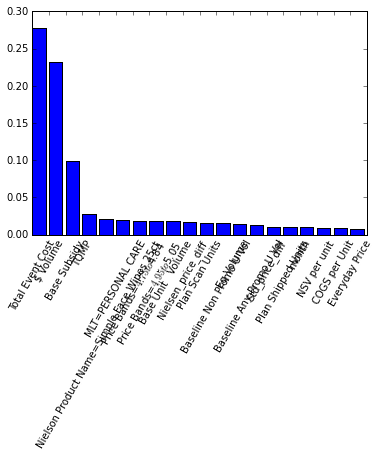

In [545]:
import matplotlib.pyplot as plt
import numpy as np

first_n = 20
indices = np.argsort(model.feature_importances_)[::-1]

plt.figure()
plt.bar(range(first_n), model.feature_importances_[indices][:first_n] )
new_features = [feature_name[i] for i in indices]
plt.xticks(range(first_n), new_features[:first_n], rotation=60)

plt.show()

### Correlation and Partial-correlation

In [546]:
reduced = pd.read_excel('./meta_data_for_modeling_0713.xlsx')

In [547]:
reduced[['Incr Event % ROI', 'Std_price_diff', '$ Volume','Base Subsidy', 'Base Unit   Volume']].corr()

Incr Event % ROI  Std_price_diff  $ Volume  Base Subsidy  \
Incr Event % ROI            1.000000       -0.002635 -0.088622     -0.210382   
Std_price_diff             -0.002635        1.000000  0.014654     -0.027272   
$ Volume                   -0.088622        0.014654  1.000000     -0.028757   
Base Subsidy               -0.210382       -0.027272 -0.028757      1.000000   
Base Unit   Volume         -0.098226        0.016316  0.713070      0.181510   

                    Base Unit   Volume  
Incr Event % ROI             -0.098226  
Std_price_diff                0.016316  
$ Volume                      0.713070  
Base Subsidy                  0.181510  
Base Unit   Volume            1.000000

###Icecream

In [548]:
icecream = reduced[ reduced['Category'].isin([u'01-GHB NOVELTIES', u'02-GHB PACKAGED', u'03-B&J NOVELTIES AND PACKAGED']) ]

In [549]:
non_icecream = reduced[ reduced['Category'].isin([u'a01-GHB NOVELTIES', u'02-GHB PACKAGED', u'03-B&J NOVELTIES AND PACKAGED']) ]

In [550]:
icecream.shape

(1995, 41)

In [551]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split 

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction import DictVectorizer
from sklearn import cross_validation

for key in numeric_cols:
    icecream[key].replace(regex=True, to_replace=r',', value=r'', inplace=True)
    icecream[key] = icecream[key].astype(float)
    
target = icecream['Incr Event % ROI']
icecream = icecream.iloc[:,1:37] 
    
icecream['Event Start Date'] = pd.to_datetime(icecream['Event Start Date'])
icecream['weekday'] = icecream['Event Start Date'].apply(lambda x:x.weekday())
icecream['month'] = icecream['Event Start Date'].apply(lambda x:x.month)
icecream['month'] = icecream['month'].astype(str)
icecream['weekday'] = icecream['weekday'].astype(str)
icecream = icecream.drop('Event Start Date', axis=1)
icecream = icecream.drop('Nielsen Event Week', axis=1)
icecream = icecream.drop('Event Description', axis=1)

vectorizer = DictVectorizer(sparse=False)

train = vectorizer.fit_transform(icecream.T.to_dict().values())
feature_name = vectorizer.feature_names_

/home/simengy/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


####Cross Validation

In [552]:
train = pd.DataFrame(train, columns=feature_name)
train = train.fillna(train.mean())

rf = RandomForestRegressor(300, max_depth=12, n_jobs=20, verbose=1)
cv_mse = -cross_validation.cross_val_score(rf, train, target, cv=5, scoring='mean_squared_error')
cv_r2 = cross_validation.cross_val_score(rf, train, target, cv=5, scoring='r2')

[Parallel(n_jobs=20)]: Done   1 out of  20 | elapsed:    0.6s remaining:   10.9s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.9s finished
[Parallel(n_jobs=20)]: Done   1 out of  20 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Done   1 out of  20 | elapsed:    0.6s remaining:   10.7s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.8s finished
[Parallel(n_jobs=20)]: Done   1 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Done   1 out of  20 | elapsed:    0.6s remaining:   10.7s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.8s finished
[Parallel(n_jobs=20)]: Done   1 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Done   1 out of  20 | elapsed:    0.8s remaining:   15.9s
[Parall

In [553]:
print 'MSE = ', np.mean(cv_mse), np.mean(cv_r2)
print 'RMSE = ', np.sqrt(np.mean(cv_mse))
print cv_mse, cv_r2

MSE =  0.837621394772 -0.473701445621
RMSE =  0.915216583532
[ 1.44018378  0.67416345  0.54126899  1.22401825  0.3084725 ] [-0.08835017 -1.47191732 -0.08521193 -0.18796885 -0.53505896]


In [590]:
train = pd.DataFrame(train, columns=feature_name)
train = train.fillna(train.mean())

x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.3)

rf = RandomForestRegressor(500, max_depth=12, n_jobs=20, verbose=0)

model = rf.fit(x_train, y_train)
pred = model.predict(x_test)

print 'MSE = ', mean_squared_error(y_test, pred)
print 'R2 = ', r2_score(y_test, pred)

pred = model.predict(x_train)

print 'MSE = ', mean_squared_error(y_train, pred)
print 'R2 = ', r2_score(y_train, pred)

MSE =  0.590729432433
R2 =  0.203510994376
(599,)
(1396,)
MSE =  0.207813191773
R2 =  0.711185464279


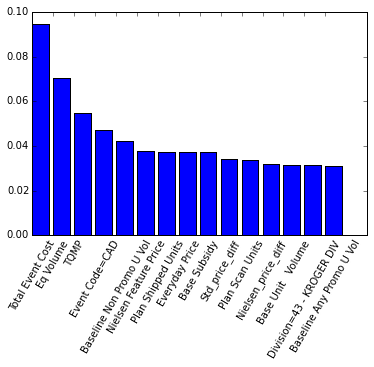

In [555]:
import matplotlib.pyplot as plt
import numpy as np

first_n = 15
indices = np.argsort(model.feature_importances_)[::-1]

plt.figure()
plt.bar(range(first_n), model.feature_importances_[indices][:first_n] )
new_features = [feature_name[i] for i in indices]
plt.xticks(range(first_n), new_features[:first_n], rotation=60)

plt.show()

####XGBOOST

In [594]:
import xgboost

param = {'bst:max_depth':12, 'bst:eta':0.008, 'silent':0, 'objective':'reg:linear', 'bst:subsample':0.5 }
param['nthread'] = 4
num_round = 400

plst = param.items()
plst += [('eval_metric', 'rmse')]
plst += [('eval_metric', 'ams@0')]

dx_base = xgboost.DMatrix(x_train, label=y_train)
bst = xgboost.train(plst, dx_base, num_round)

dx_test = xgboost.DMatrix(x_test)

xgb_pred = bst.predict(dx_test)
print xgb_pred.shape
print 'MSE = ', mean_squared_error(y_test, xgb_pred)
print 'R2 = ', r2_score(y_test, xgb_pred)

(599,)
MSE =  0.601631701839
R2 =  0.188811307444


### Grid Search

In [619]:
def col_range(data, colname):
    
    data[colname] = data[colname].astype(float)
    return data[colname].min(), data[colname].max()

def col_range_sub(data, colname):
    #assert data.shape[0] == 1, data.shape
    
    data[colname] = data[colname].astype(float)
    return data[colname] * 0.8, data[colname] * 1.2

opt_cols = ['Event Weeks', 'Plan Shipped Units', 'Feature Price', 'Total Event Cost']
#opt_cols = ['Total Event Cost', 'Plan Shipped Units', 'Feature Price']
full_range = {}

for col in opt_cols:
    search_range[col] = col_range(icecream, col)
    print col, search_range[col]

Event Weeks (1.0, 8.0)
Plan Shipped Units (0.0, 3108816.0)
Feature Price (0.0, 49.799999999999997)
Total Event Cost (73.150000000000006, 5617438.1600000001)


In [620]:
x_test = pd.DataFrame(x_test, columns=feature_name)


def optimization(origin, search_range, opt_cols, i=0):
    
    # copy the orginal data
    sample = origin.copy()
    
    if i >= len(opt_cols):
        return 0, {}
    
    N = 2
    max_KPI = 0
    max_features = {}
    
    minVal, maxVal = search_range[opt_cols[i]]
    step = (maxVal - minVal) / N
    current_val = minVal
    
    for counter in xrange(N+1):
        
        sample[opt_cols[i]] = current_val
        
        temp = model.predict(sample) 
        if max_KPI < temp:
            max_KPI = temp
            max_features[opt_cols[i]] = current_val
            
            
        temp, temp_f = optimization(sample, search_range, opt_cols, i+1)
        if max_KPI < temp:
            max_KPI = temp
            
            for key in temp_f:
                max_features[key] = temp_f[key]
            
        current_val += step
            
    return max_KPI, max_features


In [624]:
print i
col_range_sub(x_test.loc[i], opt_cols)

0


(Event Weeks                0.800
 Plan Shipped Units         4.800
 Feature Price              2.400
 Total Event Cost      234075.216
 Name: 0, dtype: float64, Event Weeks                1.200
 Plan Shipped Units         7.200
 Feature Price              3.600
 Total Event Cost      351112.824
 Name: 0, dtype: float64)

In [622]:
import datetime

start = datetime.datetime.now()

for i in xrange(1):
    
    print 'DEBUG:'
    print 'Before:', model.predict(x_test.loc[i])
    
    pred, features = optimization(x_test.loc[i], col_range_sub(x_test.loc[i], opt_cols), opt_cols, 0)
    
    print 'Comparision:', model.predict(x_test.loc[i]), pred
    
    print 'Opt feature: New -- Old' 
    for key in features:
        print key, features[key], '--', x_test[key][i]
        
print 
print 'It takes time = ', datetime.datetime.now() - start

DEBUG:
Before: [ 0.34309964]


TypeError: tuple indices must be integers, not str

0.337345577125 12.63907265 -6.996552243


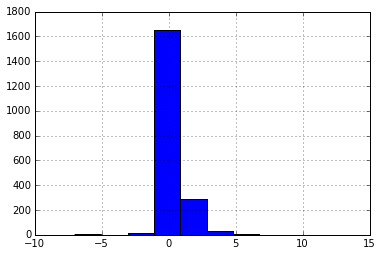

In [595]:
target.hist()
print target.mean(), target.max(), target.min()